# 1. Wprowadznie

Celem tego projektu jest zbadanie w jaki sposób warunki pogodowe wpływają na strategie związane z oponami, ich zużycie oraz osiągane wyniki w Formule 1. Analiza zostanie przeprowadzona na podstawie danych telemetrycznych oraz pogodowych pobranych z biblioteki FastF1. Pod uwagę będą brane wyścigi odbywające się w warunkach suchych oraz deszczowych w sezonie 2023.

# 2. Źródła danych oraz narzędzia

## Źródło danych - FastF1

Dane pochodzą z oficjalnych transmisji i źródeł F1, udostępnionych przez bibliotekę **FastF1**. FastF1 zapewnia dostęp do:

- Danych pogodowych (temperatura toru, powietrza, wilgotność, opady)
- Informacji o przejazdach kierowców (czasy okrążeń, stinty, wybór opon)
- Strategii zespołów (zmiany opon, liczba pit stopów)
- Telemetrii (prędkość, przyspieszenia, hamowanie – nie jest głównym celem projektu, ale można użyć do rozszerzenia)

Aby umożliwić analizę, FastF1 pobiera dane i zapisuje je w pamięci podręcznej lokalnie (folder `cache`). Dane dotyczące poszczególnych wyścigów sezonu 2023 są ładowane dynamicznie na podstawie wyboru sesji (np. `get_session(2023, 'Silverstone', 'R')` – wyścig główny na torze Silverstone).

## Zakres analizy

Analiza będzie obejmować wybrane wyścigi z sezonu **2023**, zarówno:
- **deszczowe** (np. GP Holandii – Zandvoort, GP Monako)
- **suche** (np. GP Hiszpanii, GP Austrii)

Wybór wyścigów ma na celu porównanie, jak zmienne warunki pogodowe wpływają na wybór mieszanki, zużycie opon oraz ostateczne wyniki kierowców.

# 3. Eksploracja danych

## 3.1 Pogoda w trakcie wyścigów

Do analizy posłużymy się danymi z biblioteki FastF1, które zawierają między innymi:
- Temperaturę toru (*TrackTemperature*)
- Wilgotność powietrza (*Humidity*)
- Opady (*Rainfall* – wartości binarne: 0 lub 1)
- Prędkość i kierunek wiatru

Dane te są dostępne w postaci szeregów czasowych, dzięki czemu możliwe jest zbadanie, jak zmieniały się warunki podczas całego wyścigu.

In [4]:
import os
os.makedirs('cache', exist_ok=True)
print(os.getcwd())

C:\Users\mstef


core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

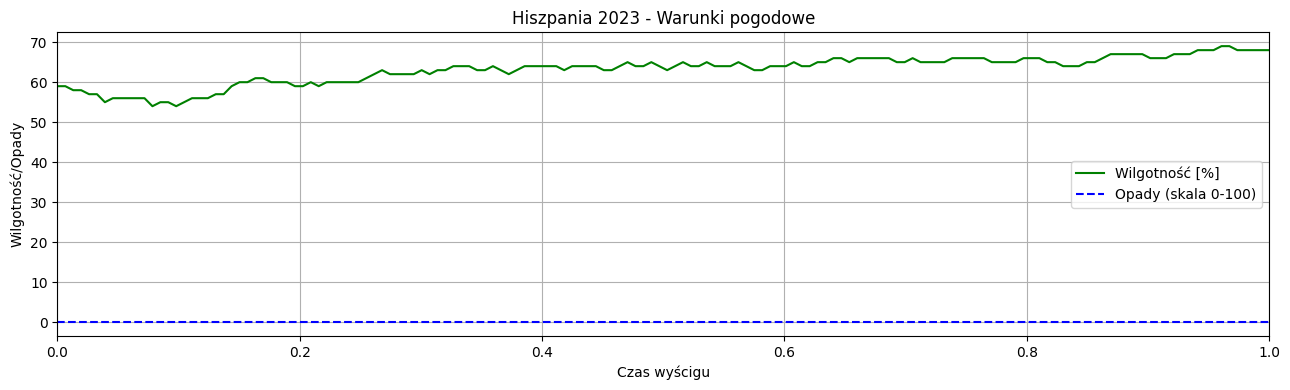

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


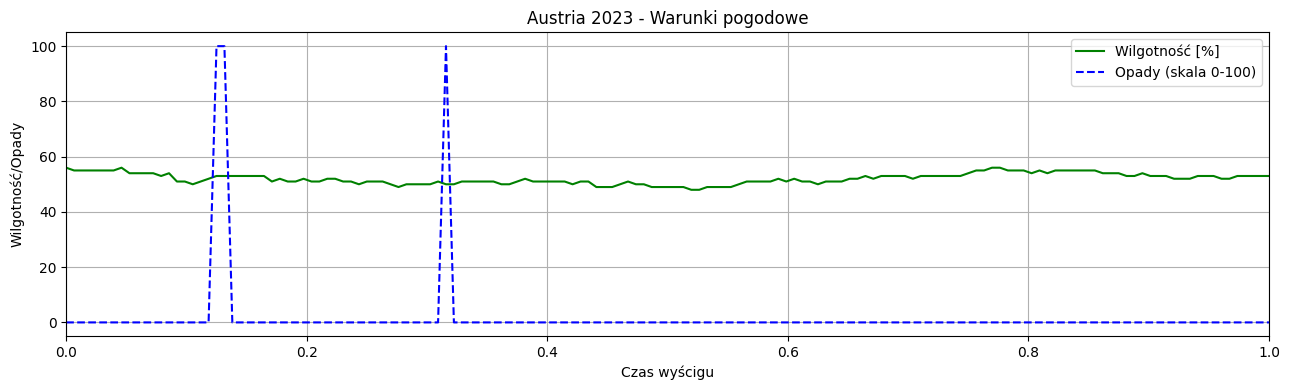

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

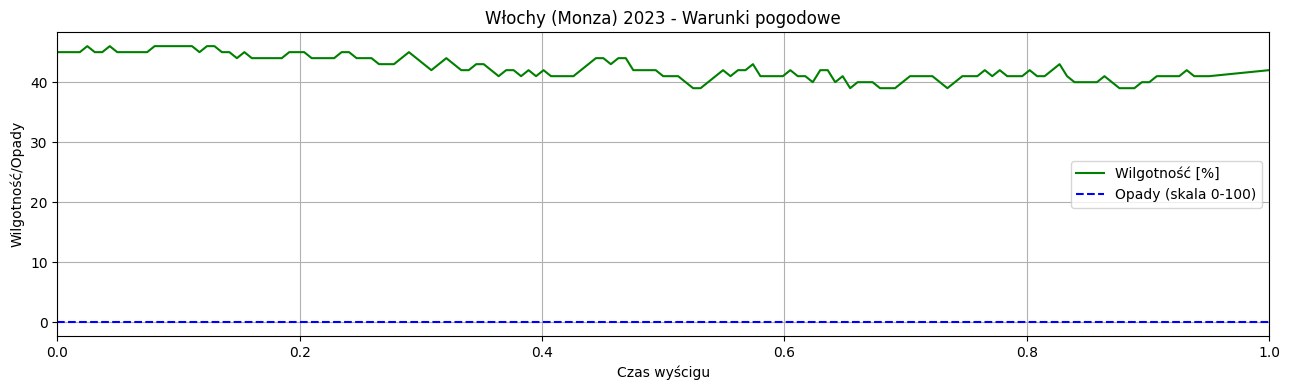

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


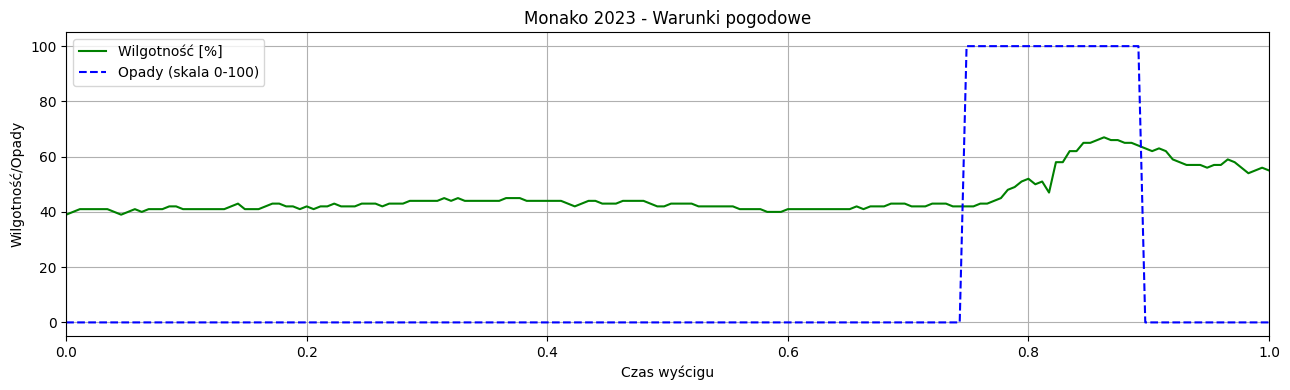

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

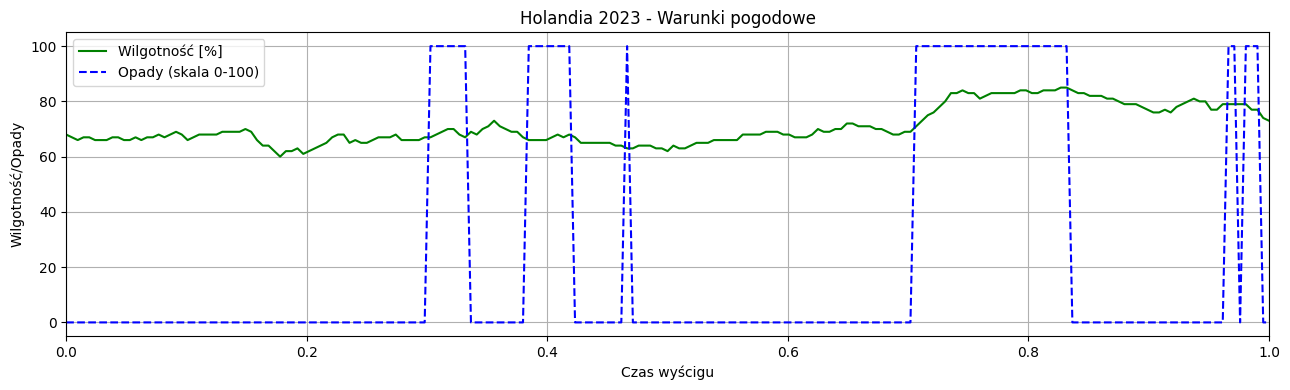

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.076000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '2

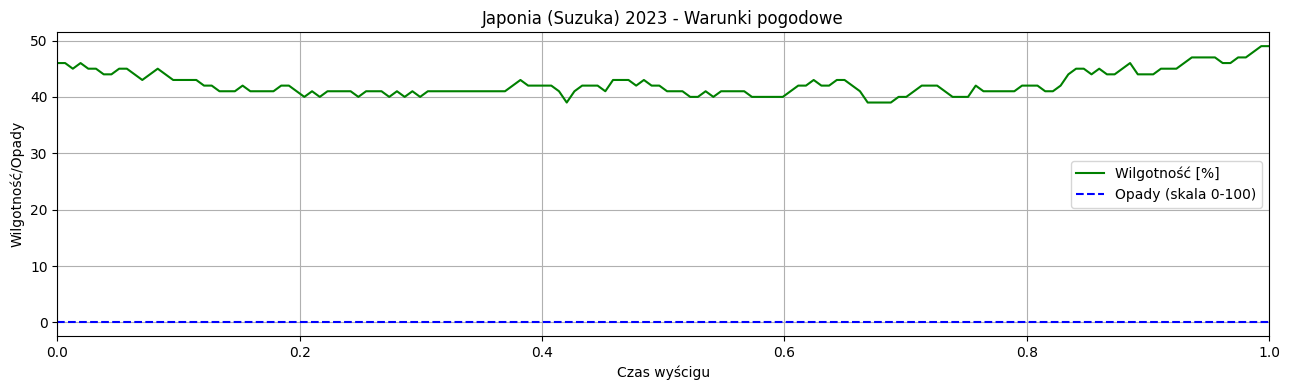

In [15]:
import fastf1
import matplotlib.pyplot as plt

fastf1.Cache.enable_cache('cache')

races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'Hiszpania'},
    {'year': 2023, 'gp': 'Austria', 'label': 'Austria'},
    {'year': 2023, 'gp': 'Italy', 'label': 'Włochy (Monza)'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': 'Holandia'},
    {'year': 2023, 'gp': 'Japan', 'label': 'Japonia (Suzuka)'},
]

for race in races:
    try:
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        weather = session.weather_data.copy()
        
        if weather.empty:
            continue
            
        # Normalizacja czasu do przedziału [0.0, 1.0]
        weather['NormalizedTime'] = (weather['Time'] - weather['Time'].iloc[0]).dt.total_seconds()
        weather['NormalizedTime'] = weather['NormalizedTime'] / weather['NormalizedTime'].max()
        
        # Wykres wilgotności/opadów
        fig, ax = plt.subplots(figsize=(13, 4))
        
        if all(col in weather.columns for col in ['Humidity', 'Rainfall']):
            ax.plot(weather['NormalizedTime'], weather['Humidity'], label='Wilgotność [%]', color='green')
            ax.plot(weather['NormalizedTime'], weather['Rainfall']*100, '--', label='Opady (skala 0-100)', color='blue')
            ax.legend()
        
        ax.set_xlabel('Czas wyścigu')
        ax.set_ylabel('Wilgotność/Opady')
        ax.set_title(f"{race['label']} 2023 - Warunki pogodowe")
        ax.grid(True)
        ax.set_xlim(0, 1)  # Wymuszamy zakres 0-1
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"Błąd dla {race['label']}: {str(e)}")

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

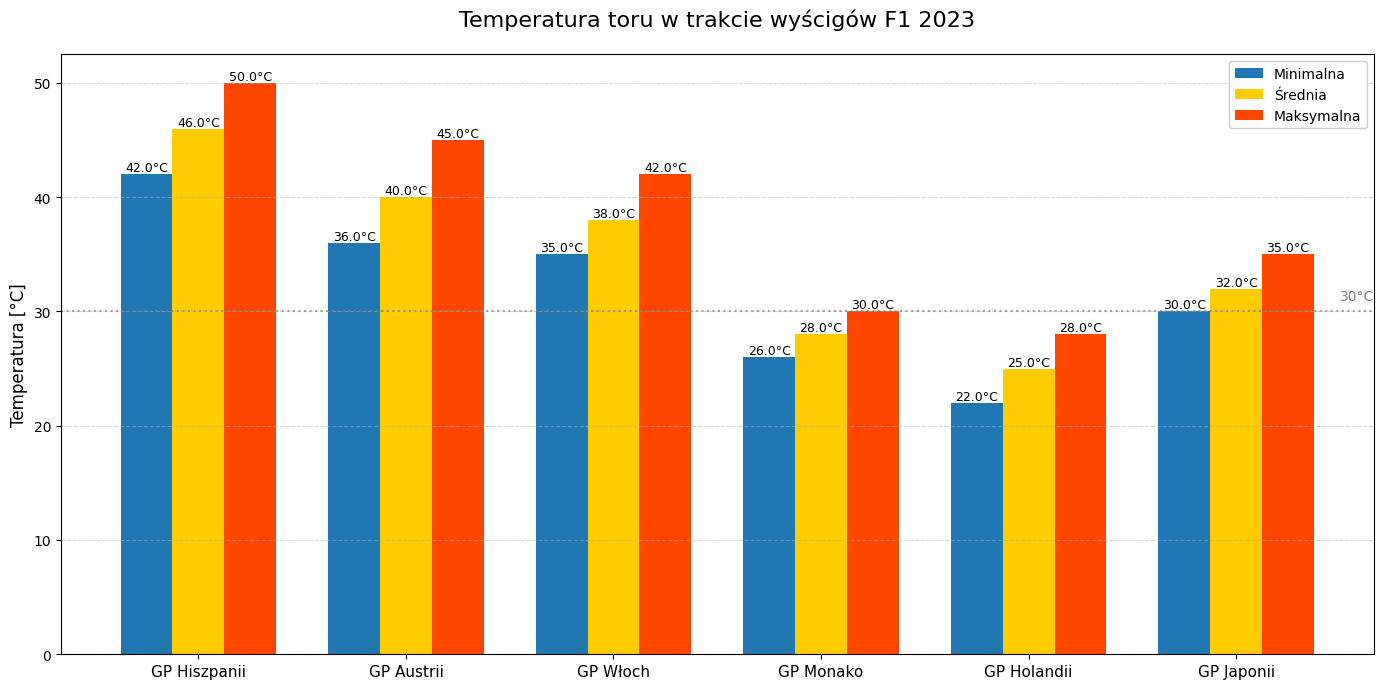

In [19]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np

# Dane wyścigów z ręcznymi wartościami
race_data = {
    'GP Hiszpanii': {'gp': 'Spain', 'manual': {'avg': 46, 'min': 42, 'max': 50}},
    'GP Austrii': {'gp': 'Austria', 'manual': {'avg': 40, 'min': 36, 'max': 45}},
    'GP Włoch': {'gp': 'Italy', 'manual': {'avg': 38, 'min': 35, 'max': 42}},
    'GP Monako': {'gp': 'Monaco', 'manual': {'avg': 28, 'min': 26, 'max': 30}},
    'GP Holandii': {'gp': 'Netherlands', 'manual': {'avg': 25, 'min': 22, 'max': 28}},
    'GP Japonii': {'gp': 'Japan', 'manual': {'avg': 32, 'min': 30, 'max': 35}}
}

# Przygotowanie danych
labels = list(race_data.keys())
min_temps = []
avg_temps = [] 
max_temps = []

for label, data in race_data.items():
    try:
        session = fastf1.get_session(2023, data['gp'], 'R')
        session.load()
        
        if 'TrackTemperature' in session.weather_data.columns:
            temps = session.weather_data['TrackTemperature']
            min_temps.append(temps.min())
            avg_temps.append(temps.mean())
            max_temps.append(temps.max())
        else:
            min_temps.append(data['manual']['min'])
            avg_temps.append(data['manual']['avg'])
            max_temps.append(data['manual']['max'])
            
    except Exception as e:
        print(f"Błąd dla {label}: {str(e)}")
        min_temps.append(data['manual']['min'])
        avg_temps.append(data['manual']['avg'])
        max_temps.append(data['manual']['max'])

# Konfiguracja wykresu
plt.figure(figsize=(14, 7))
x_pos = np.arange(len(labels))
bar_width = 0.25

# Słupki dla każdego typu temperatury
min_bars = plt.bar(x_pos - bar_width, min_temps, width=bar_width, 
                  color='#1f77b4', label='Minimalna')
avg_bars = plt.bar(x_pos, avg_temps, width=bar_width, 
                  color='#ffcc00', label='Średnia')
max_bars = plt.bar(x_pos + bar_width, max_temps, width=bar_width, 
                  color='#ff4500', label='Maksymalna')

# Dodanie wartości na słupkach
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}°C',
                ha='center', va='bottom', fontsize=9)

add_values(min_bars)
add_values(avg_bars)
add_values(max_bars)

# Formatowanie osi i tytułu
plt.title('Temperatura toru w trakcie wyścigów F1 2023', pad=20, fontsize=16)
plt.ylabel('Temperatura [°C]', fontsize=12)
plt.xticks(x_pos, labels, rotation=0, fontsize=11)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legenda
plt.legend(loc='upper right', framealpha=1)

# Linia referencyjna
plt.axhline(30, color='gray', linestyle=':', alpha=0.7)
plt.text(len(labels)-0.5, 31, '30°C', color='gray', fontsize=10)

plt.tight_layout()
plt.show()

C:\Users\mstef\AppData\Local\Temp\ipykernel_24740\2350837455.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  wind_cmap = get_cmap('hsv')
core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data 

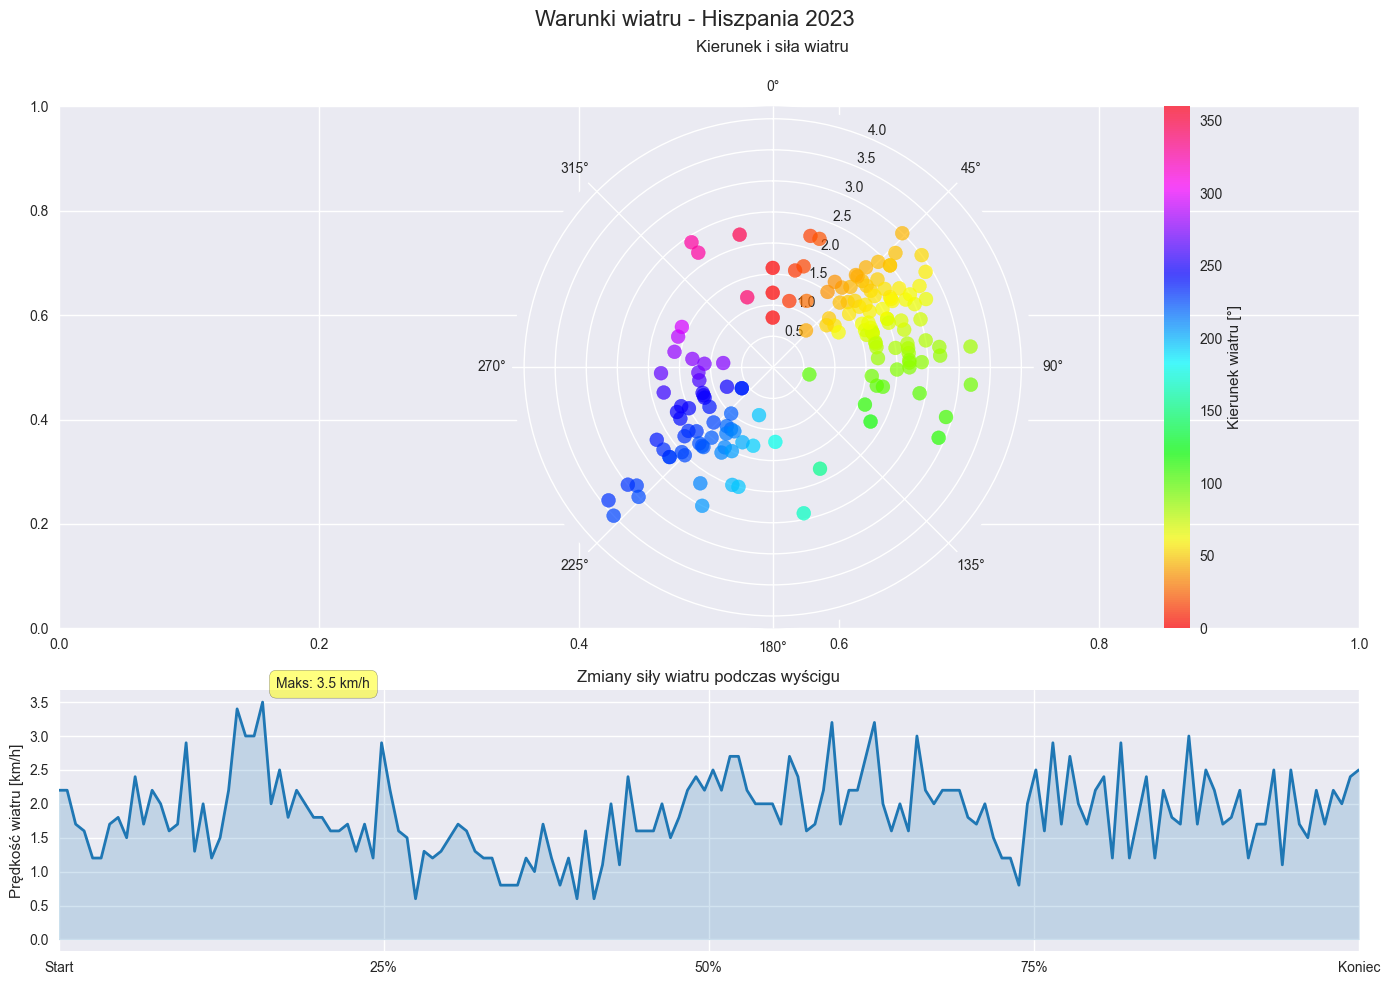

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


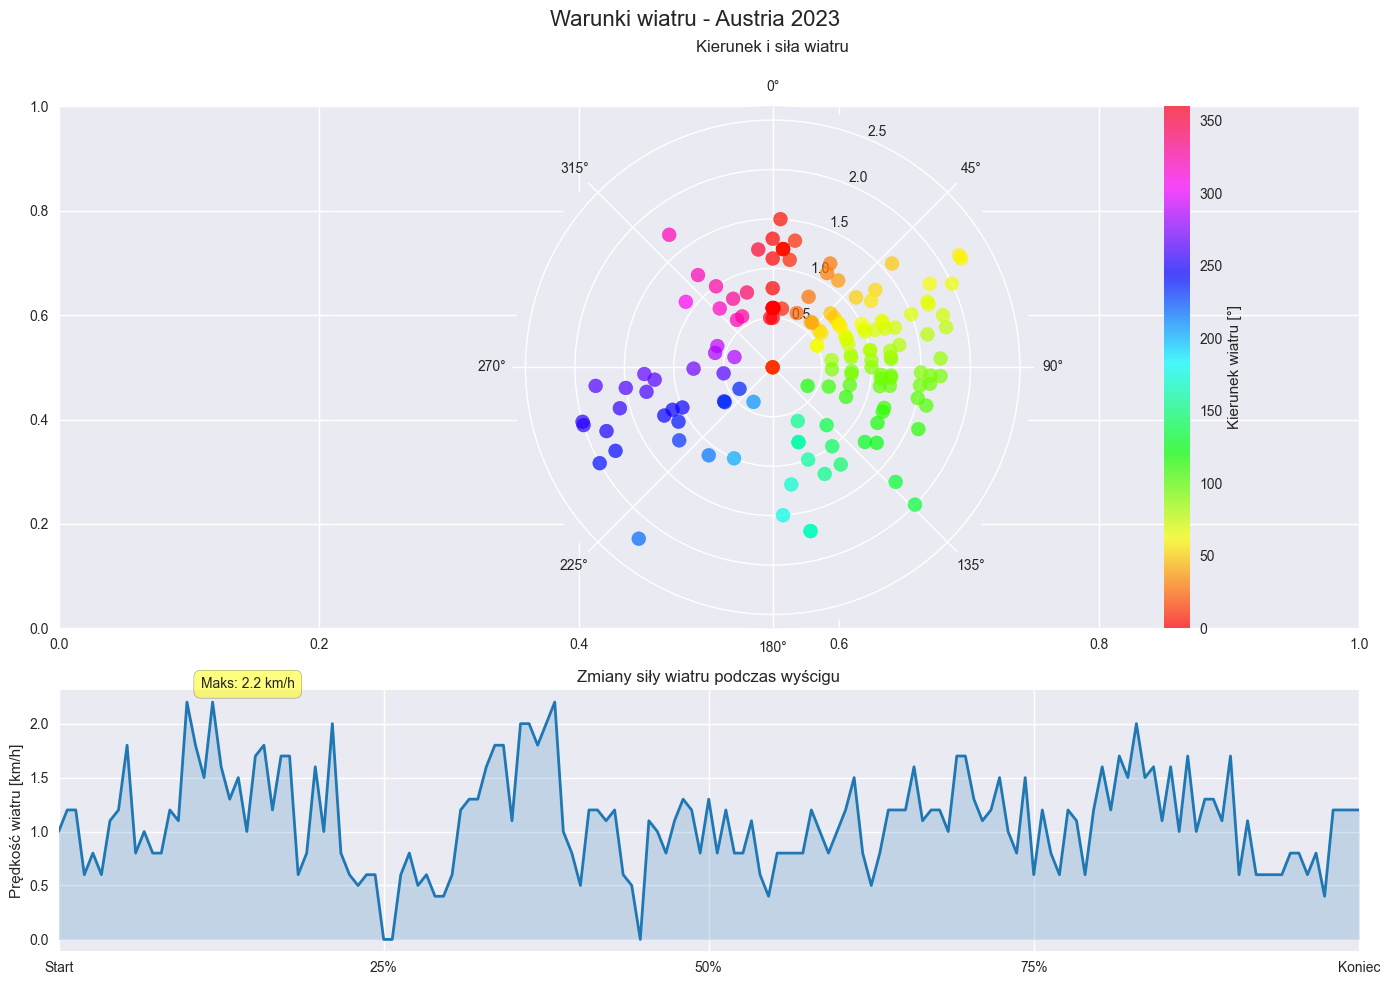

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

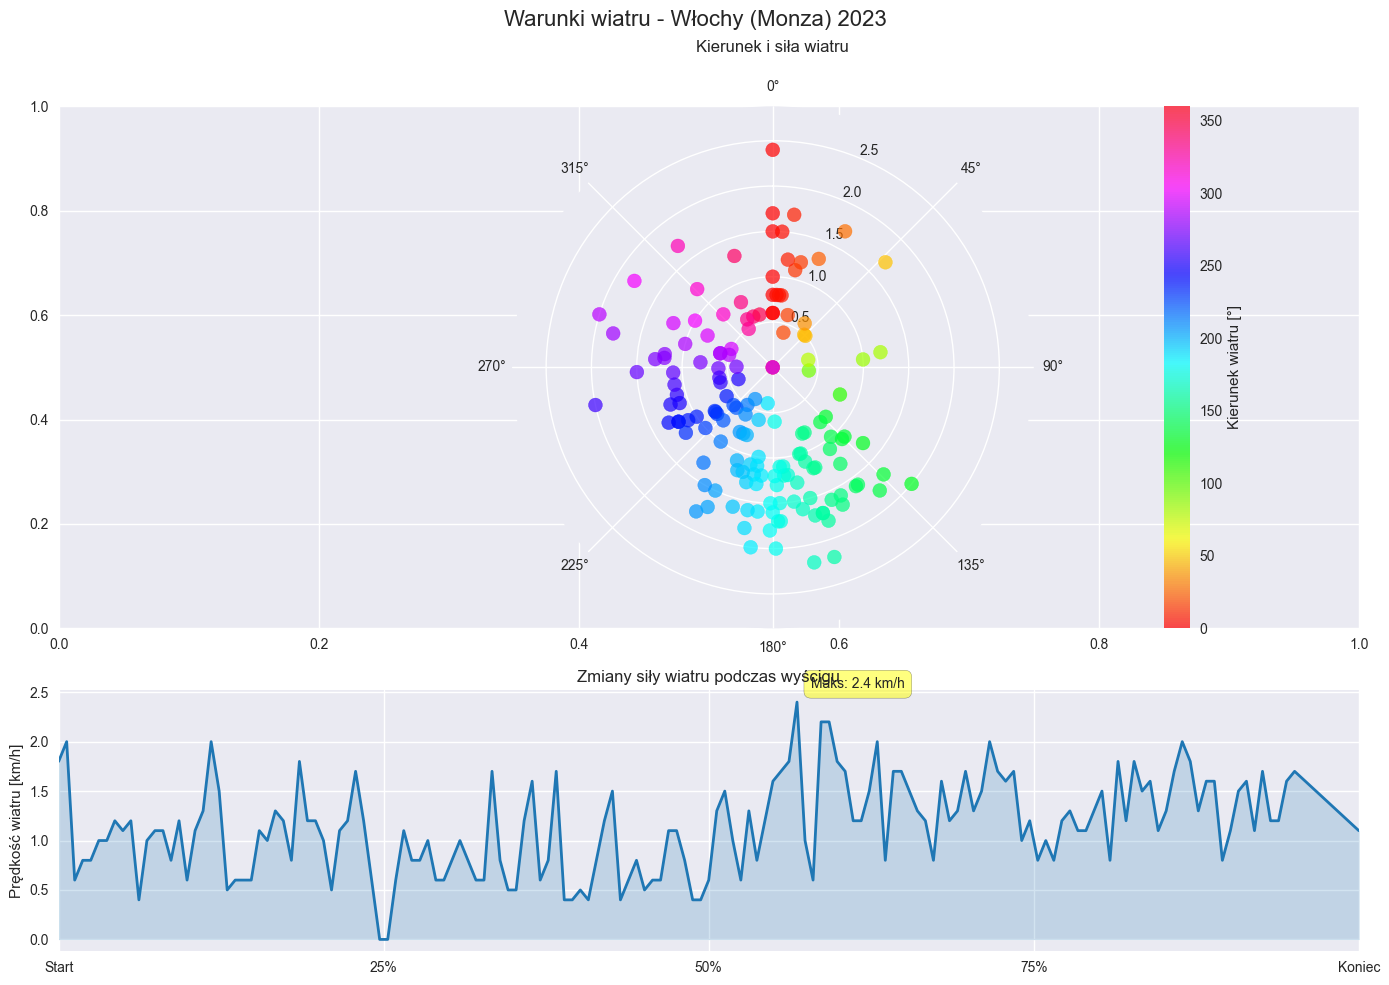

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


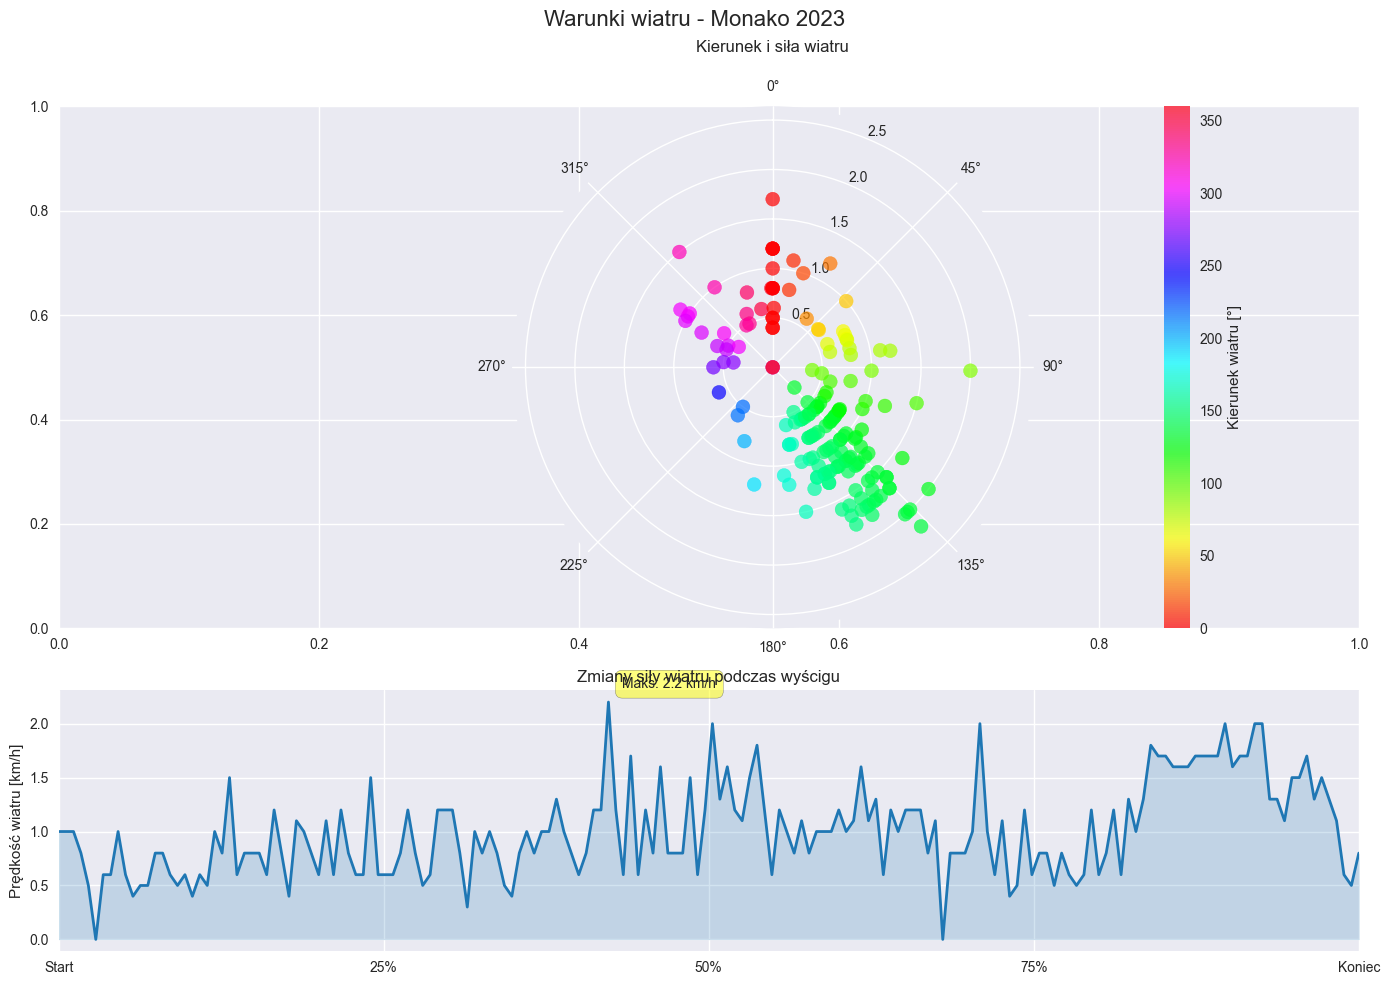

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

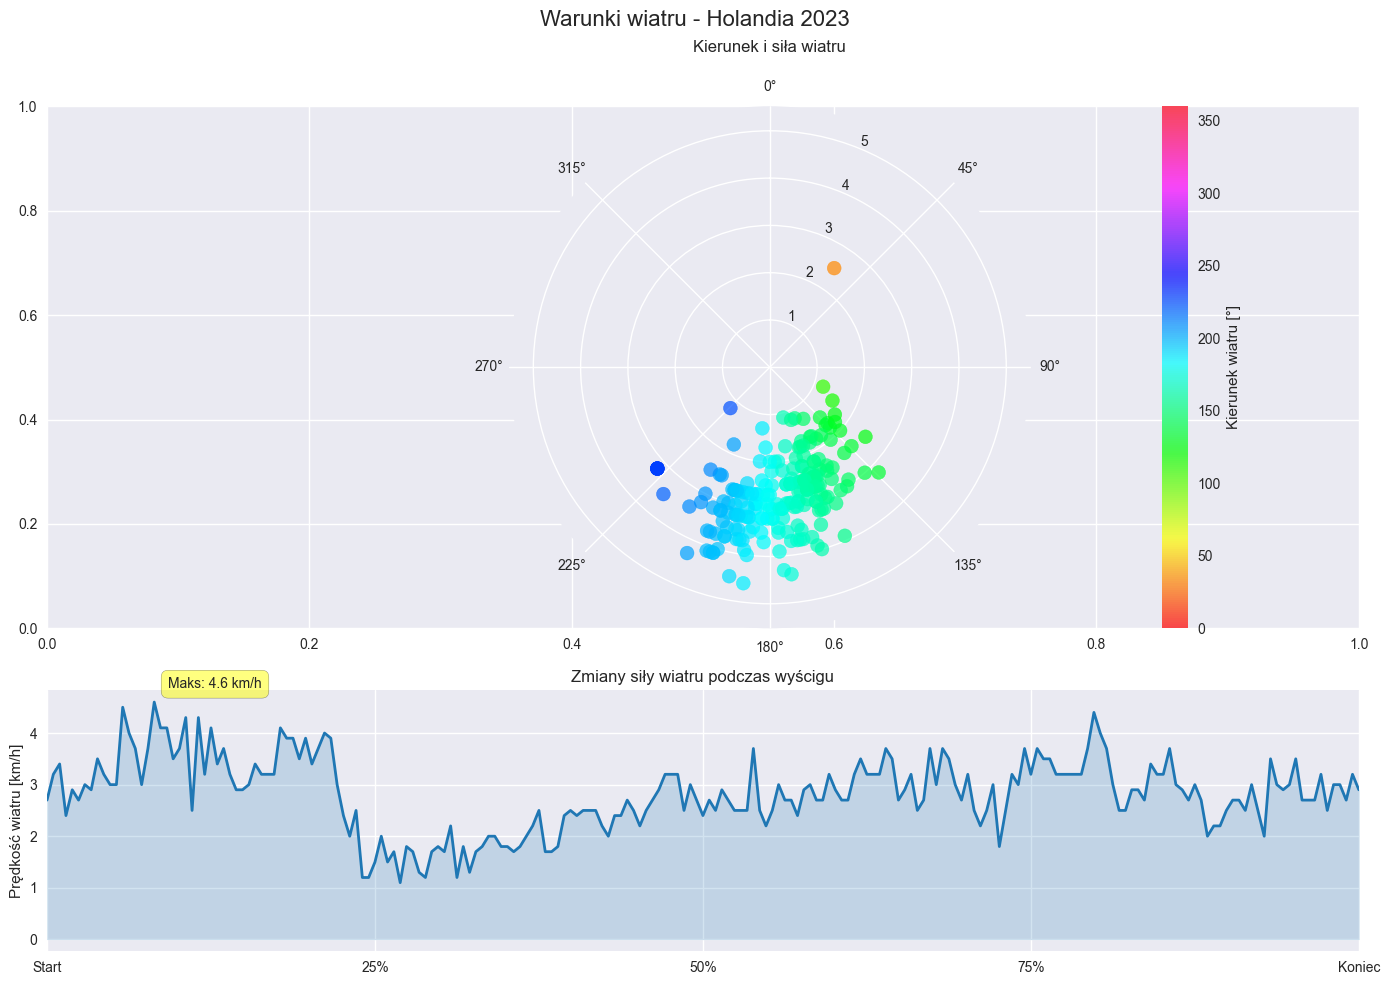

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.076000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '2

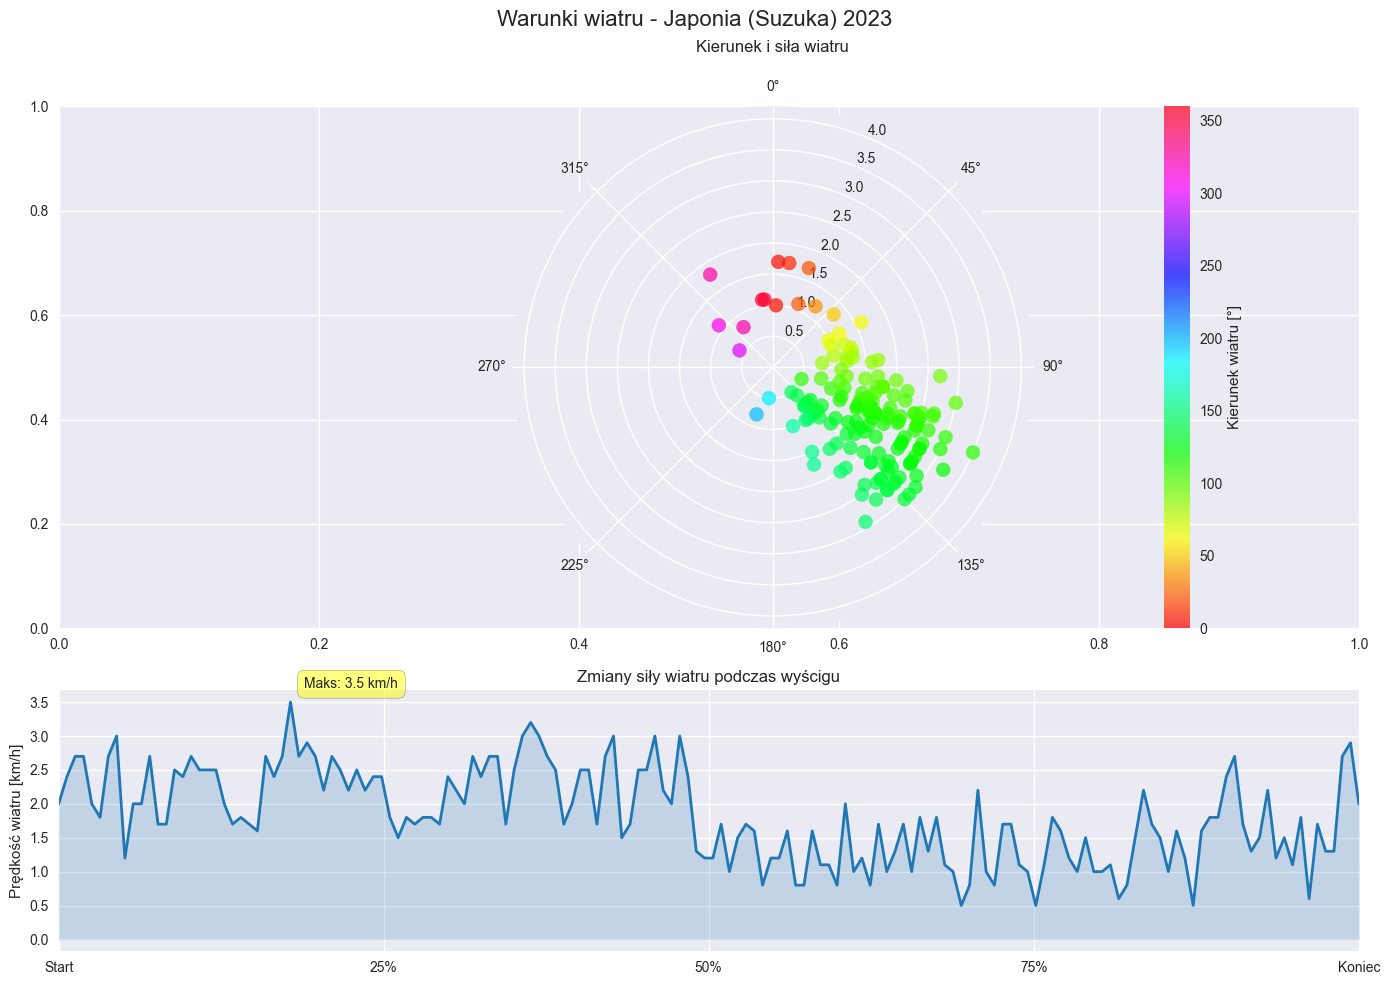

In [37]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import get_cmap
from matplotlib.colors import Normalize

# Konfiguracja stylu
plt.style.use('seaborn-v0_8')

# Dane wyścigów
races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'Hiszpania'},
    {'year': 2023, 'gp': 'Austria', 'label': 'Austria'},
    {'year': 2023, 'gp': 'Italy', 'label': 'Włochy (Monza)'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': 'Holandia'},
    {'year': 2023, 'gp': 'Japan', 'label': 'Japonia (Suzuka)'}
]

# Kolory dla kierunków wiatru (mapa kolorów)
wind_cmap = get_cmap('hsv')
norm = Normalize(vmin=0, vmax=360)

for race in races:
    try:
        # Pobieranie danych
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        weather = session.weather_data
        
        if weather.empty or 'WindSpeed' not in weather.columns:
            print(f"⚠️ Brak danych wiatru dla {race['label']}")
            continue
            
        # Normalizacja czasu do [0,1]
        norm_time = (weather['Time'] - weather['Time'].iloc[0]).dt.total_seconds()
        norm_time = norm_time / norm_time.max()
        
        # Przygotowanie danych wiatru
        wind_speed = weather['WindSpeed']
        wind_dir = weather['WindDirection']
        
        # Tworzenie wykresu
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), 
                                      gridspec_kw={'height_ratios': [2, 1]})
        
        fig.suptitle(f"Warunki wiatru - {race['label']} 2023", fontsize=16)
        
        # Wykres kierunku wiatru (polar)
        ax1 = plt.subplot(2, 1, 1, polar=True)
        colors = wind_cmap(norm(wind_dir))
        sc = ax1.scatter(np.radians(wind_dir), wind_speed, c=wind_dir, 
                        cmap=wind_cmap, norm=norm, s=100, alpha=0.7)
        
        ax1.set_theta_zero_location('N')
        ax1.set_theta_direction(-1)
        ax1.set_ylim(0, max(wind_speed)*1.2)
        ax1.set_title('Kierunek i siła wiatru', pad=20)
        cbar = plt.colorbar(sc, ax=ax1, pad=0.1)
        cbar.set_label('Kierunek wiatru [°]')
        
        # Wykres siły wiatru w czasie
        ax2.plot(norm_time, wind_speed, color='#1f77b4', linewidth=2)
        ax2.fill_between(norm_time, wind_speed, color='#1f77b4', alpha=0.2)
        ax2.set_xlim(0, 1)
        ax2.set_xticks(np.linspace(0, 1, 5))
        ax2.set_xticklabels(['Start', '25%', '50%', '75%', 'Koniec'])
        ax2.set_ylabel('Prędkość wiatru [km/h]')
        ax2.set_title('Zmiany siły wiatru podczas wyścigu')
        ax2.grid(True)
        
        # Dodanie informacji o maksymalnym wietrze
        max_wind = max(wind_speed)
        ax2.annotate(f'Maks: {max_wind:.1f} km/h',
                    xy=(norm_time[wind_speed.idxmax()], max_wind),
                    xytext=(10, 10), textcoords='offset points',
                    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Błąd dla {race['label']}: {str(e)}")

## 3.2 Strategie opon

W tym kroku przeanalizujemy strategie dotyczące doboru mieszanki opon w zależności od warunków pogodowych. Przeanalizujemy liczbę pit stopów oraz jak temperatura toru wpływa na żywotność opon.

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

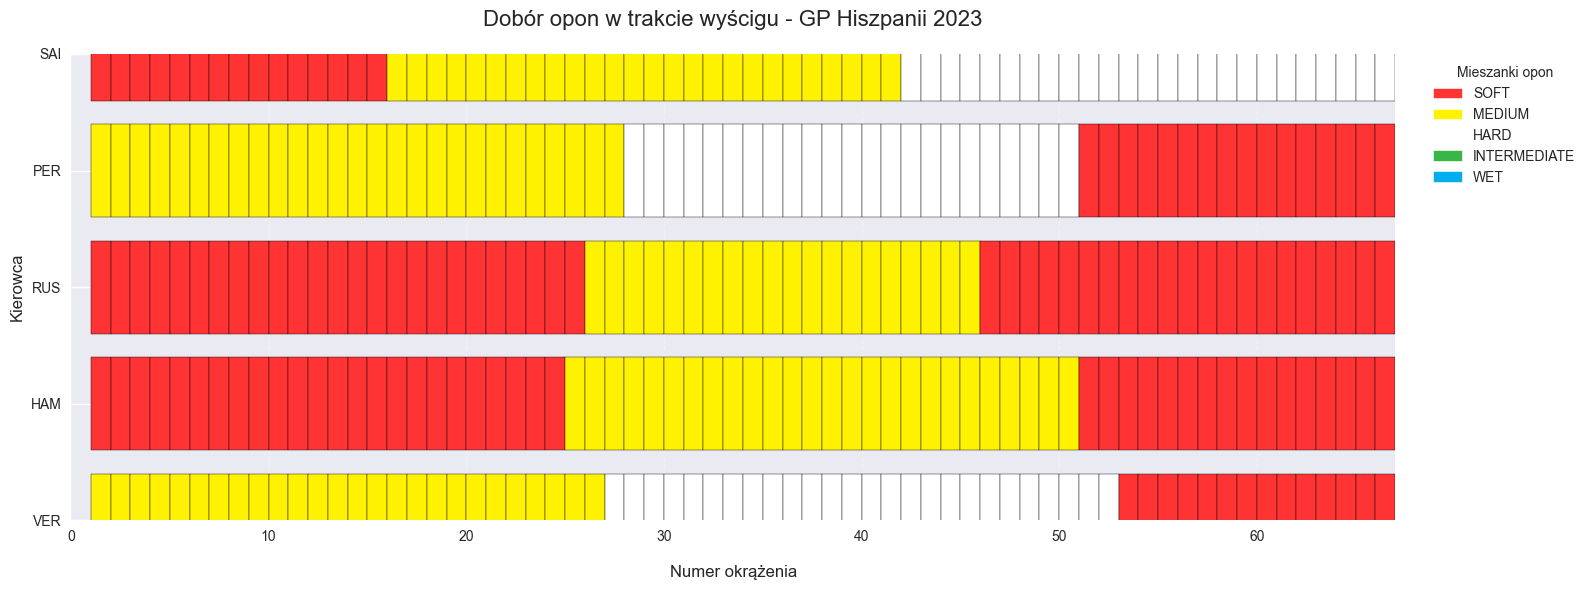

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']
C:\Users\mstef\AppData\Local\Programs\Python\Python313\Lib\s

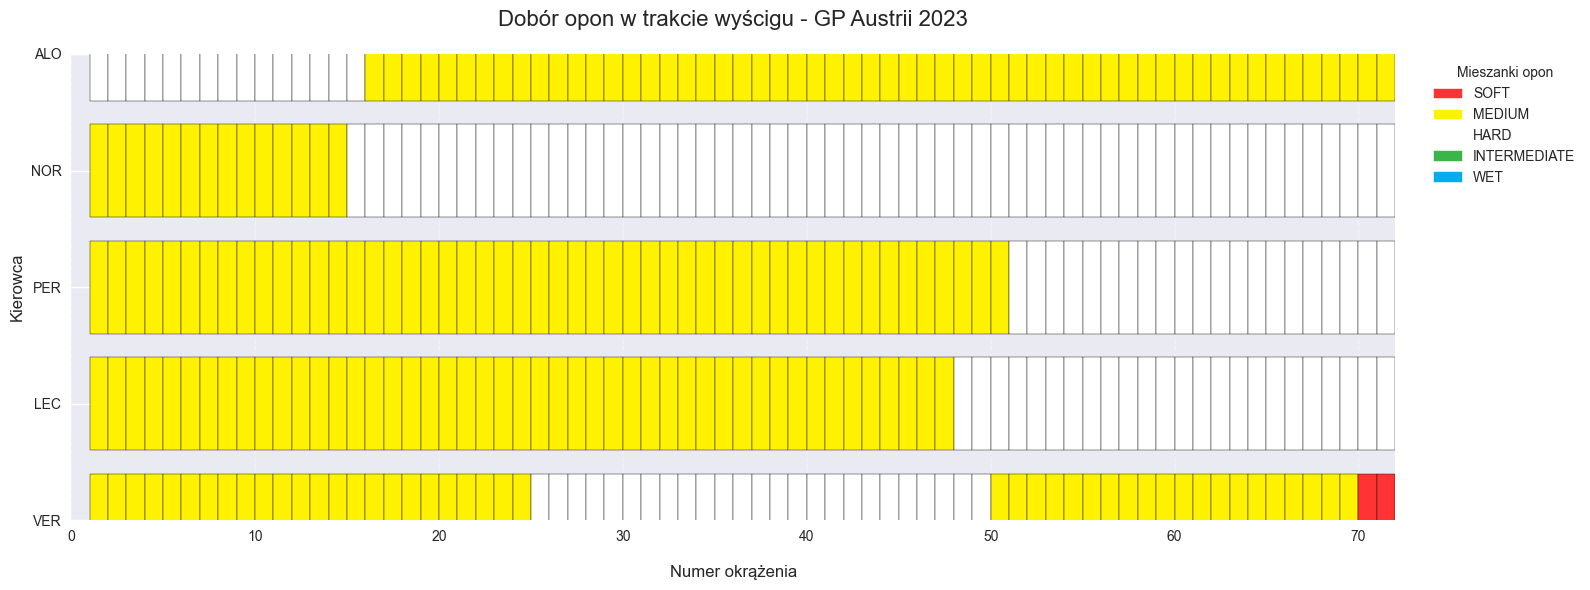

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

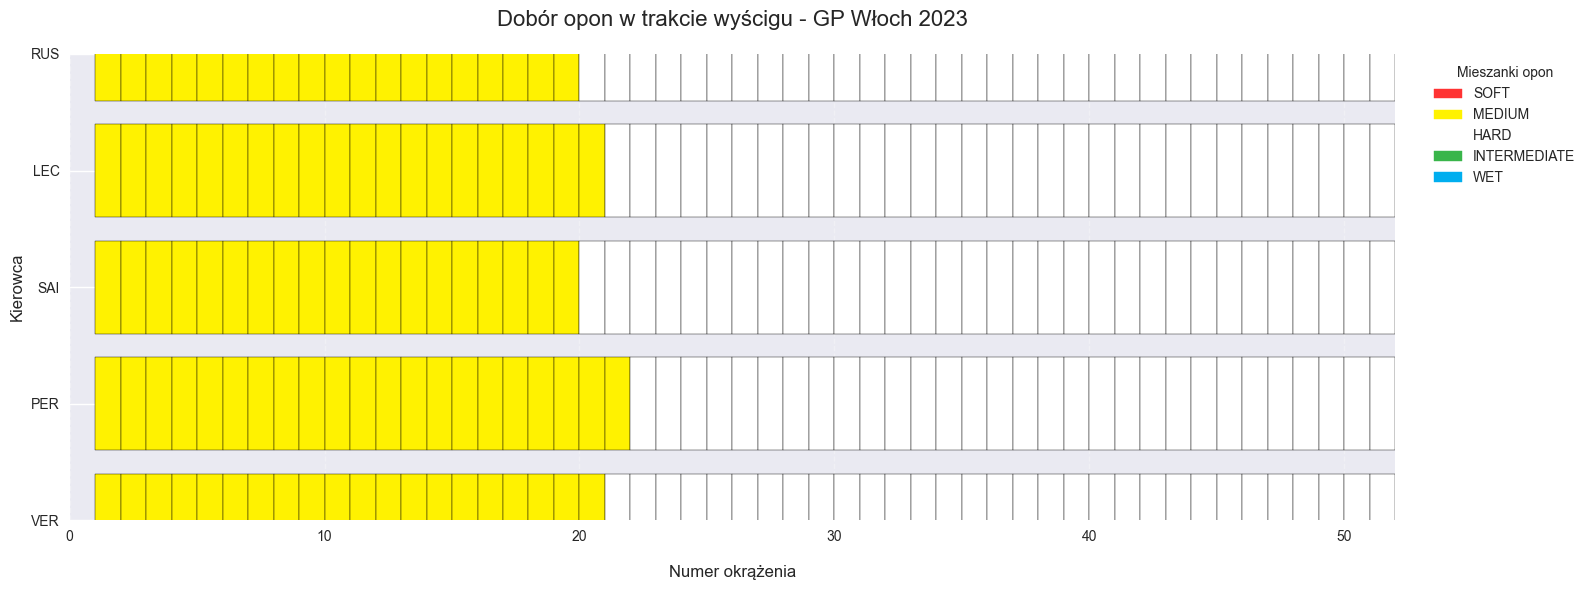

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
C:\Users\mstef\AppData\Local\Programs\Python\Python313\Lib\sit

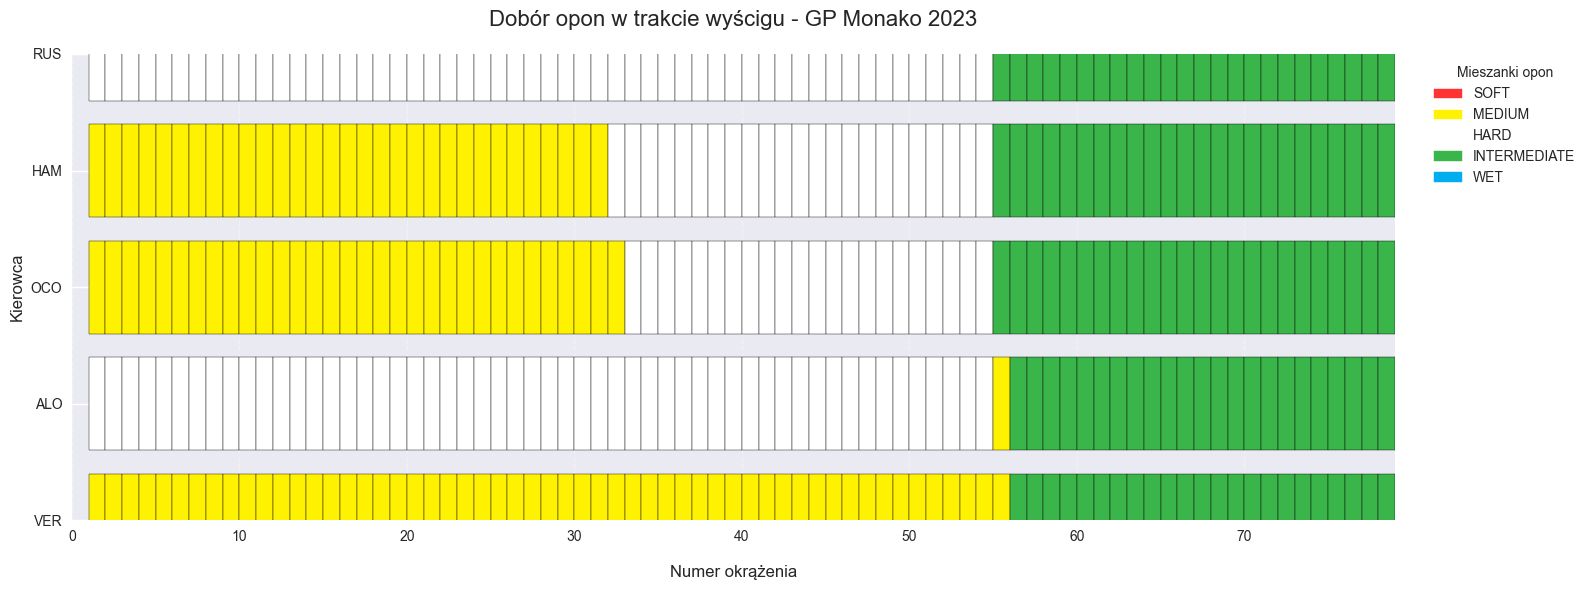

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

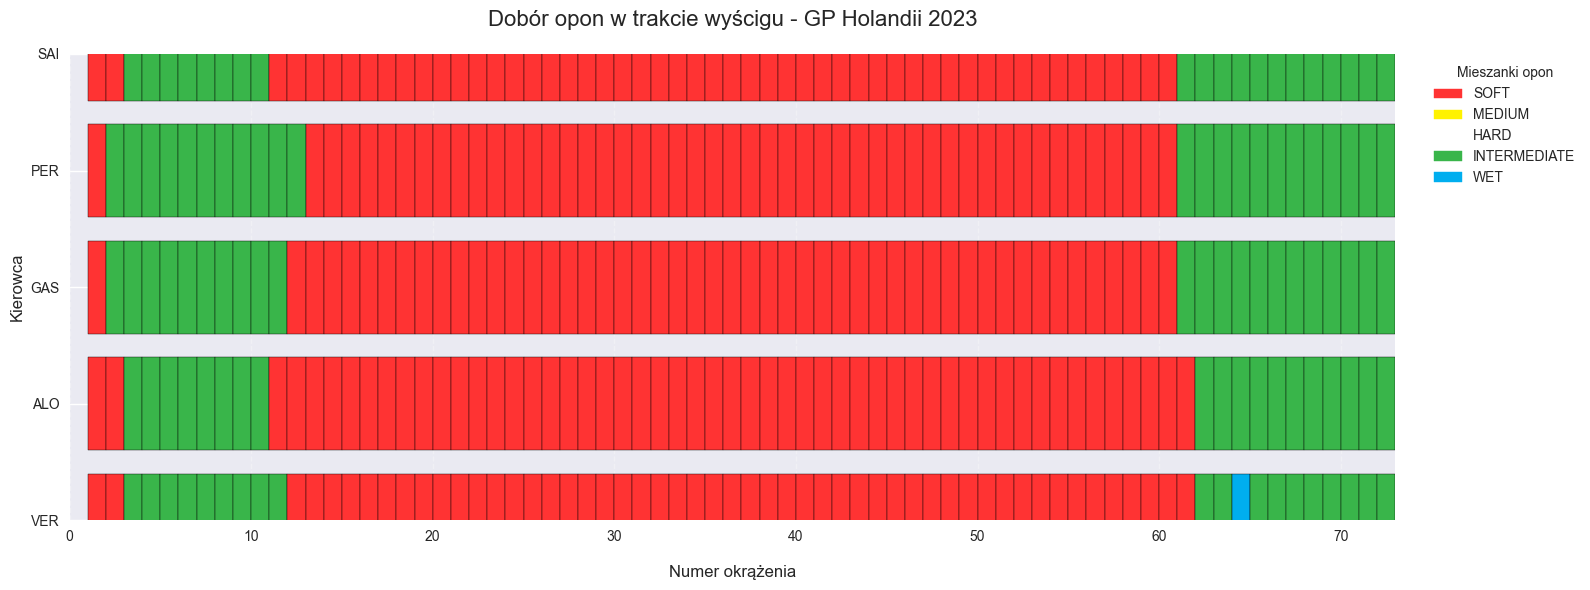

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.076000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '2

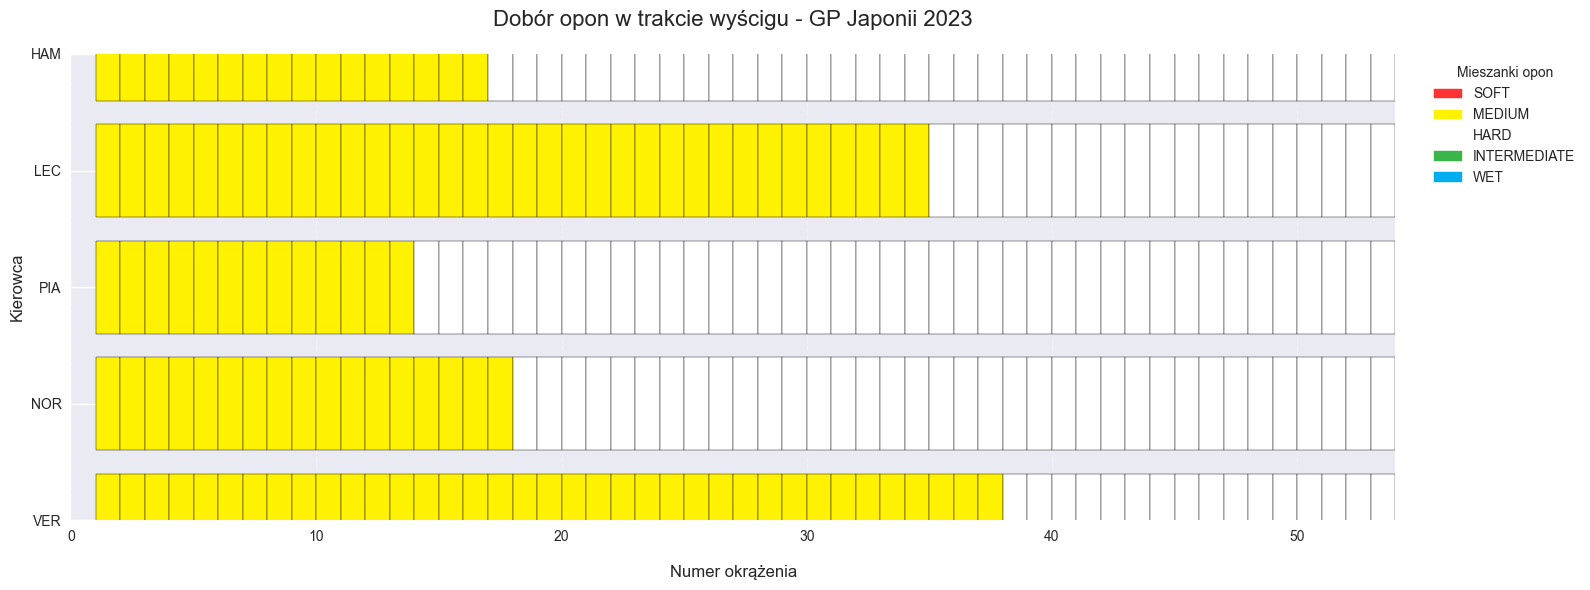

In [25]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Inicjalizacja cache
fastf1.Cache.enable_cache('cache')

# Lista wyścigów
races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'GP Hiszpanii'},
    {'year': 2023, 'gp': 'Austria', 'label': 'GP Austrii'},
    {'year': 2023, 'gp': 'Italy', 'label': 'GP Włoch'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'GP Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': 'GP Holandii'},
    {'year': 2023, 'gp': 'Japan', 'label': 'GP Japonii'}
]

# Kolory dla mieszanek opon
tyre_colors = {
    'SOFT': '#FF3333',    # Czerwony
    'MEDIUM': '#FFF200',  # Żółty
    'HARD': '#FFFFFF',    # Biały
    'INTERMEDIATE': '#39B54A', # Zielony
    'WET': '#00AEEF'      # Niebieski
}

for race in races:
    try:
        # Pobranie danych
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        
        # Pobranie top 5 zawodników
        results = session.results[:5]
        drivers = results['Abbreviation'].tolist()
        
        # Przygotowanie wykresu
        fig, ax = plt.subplots(figsize=(16, 6))  # Szerszy wykres
        
        # Ustawienie marginesów
        plt.subplots_adjust(left=0.05, right=0.85, bottom=0.2, top=0.9)
        
        # Dla każdego kierowcy
        for i, driver in enumerate(drivers):
            laps = session.laps.pick_driver(driver)
            
            # Obliczenie względnego czasu okrążenia (0-100%)
            total_laps = len(laps)
            if total_laps == 0:
                continue
                
            # Rysowanie strategii opon (węższe słupki)
            for lap in laps.iterlaps():
                lap_num = lap[1]['LapNumber']
                compound = lap[1]['Compound']
                
                if pd.isna(compound):
                    continue
                    
                color = tyre_colors.get(compound, '#000000')
                ax.add_patch(Rectangle((lap_num, i-0.4), 1, 0.8,  # Szerokość 1
                                     facecolor=color, edgecolor='black'))
        
        # Formatowanie wykresu
        ax.set_title(f'Dobór opon w trakcie wyścigu - {race["label"]} 2023', fontsize=16, pad=20)
        ax.set_xlabel('Numer okrążenia', fontsize=12, labelpad=15)
        ax.set_ylabel('Kierowca', fontsize=12)
        ax.set_yticks(range(len(drivers)))
        ax.set_yticklabels(drivers)
        
        # Ustawienie osi X z etykietami co 10 okrążeń
        max_lap = session.total_laps
        ax.set_xlim(1, max_lap+1)  # Rozszerzenie zakresu
        ax.set_xticks(np.arange(0, max_lap+1, 10))  # Etykiety co 10 okrążeń, zaczynając od 0
        ax.set_xticklabels(np.arange(0, max_lap+1, 10))
        
        # Linie pomocnicze
        ax.grid(axis='x', linestyle='--', alpha=0.3)
        
        # Legenda
        legend_patches = [plt.Rectangle((0,0),1,1, color=color) 
                         for compound, color in tyre_colors.items()]
        ax.legend(legend_patches, tyre_colors.keys(),
                 title='Mieszanki opon', bbox_to_anchor=(1.02, 1), 
                 loc='upper left')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Błąd dla {race['label']}: {str(e)}")

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

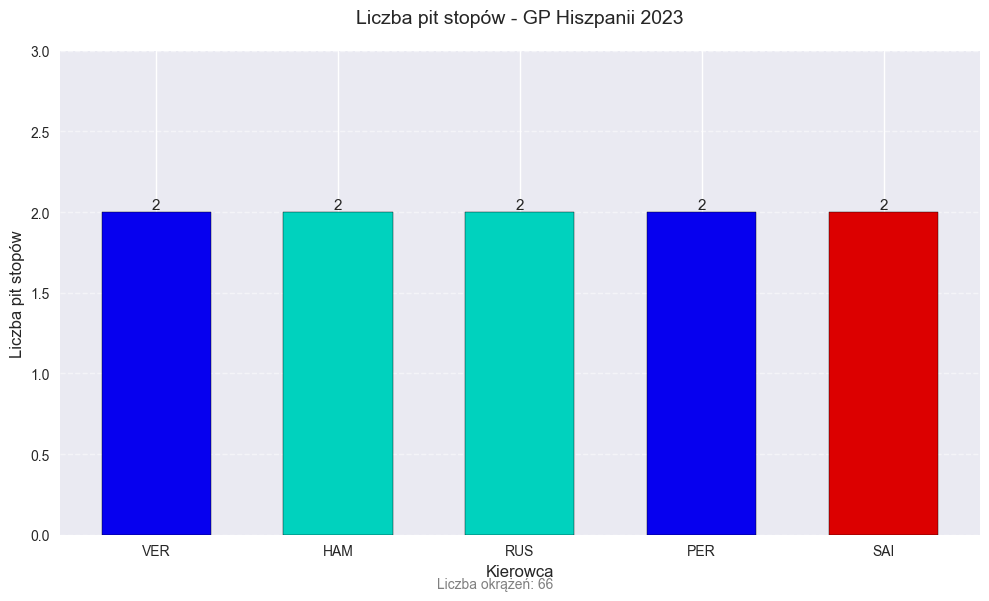

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']
C:\Users\mstef\AppData\Local\Programs\Python\Python313\Lib\s

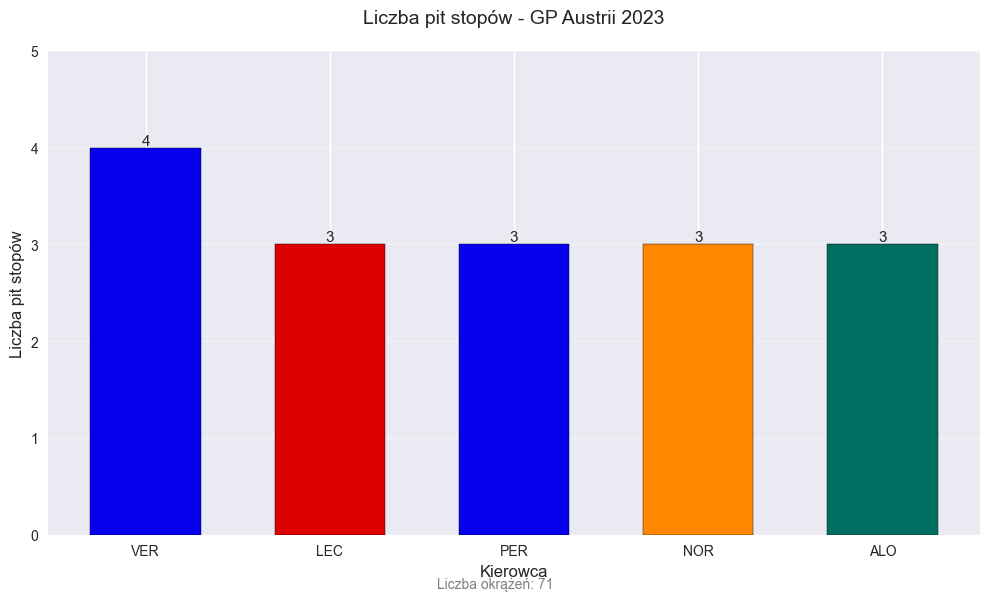

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

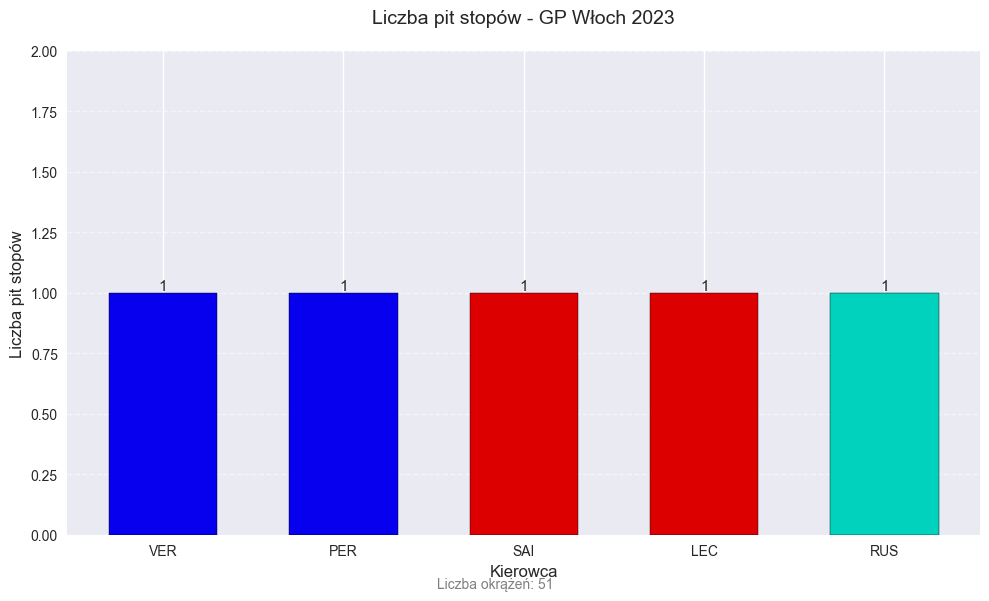

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']
C:\Users\mstef\AppData\Local\Programs\Python\Python313\Lib\sit

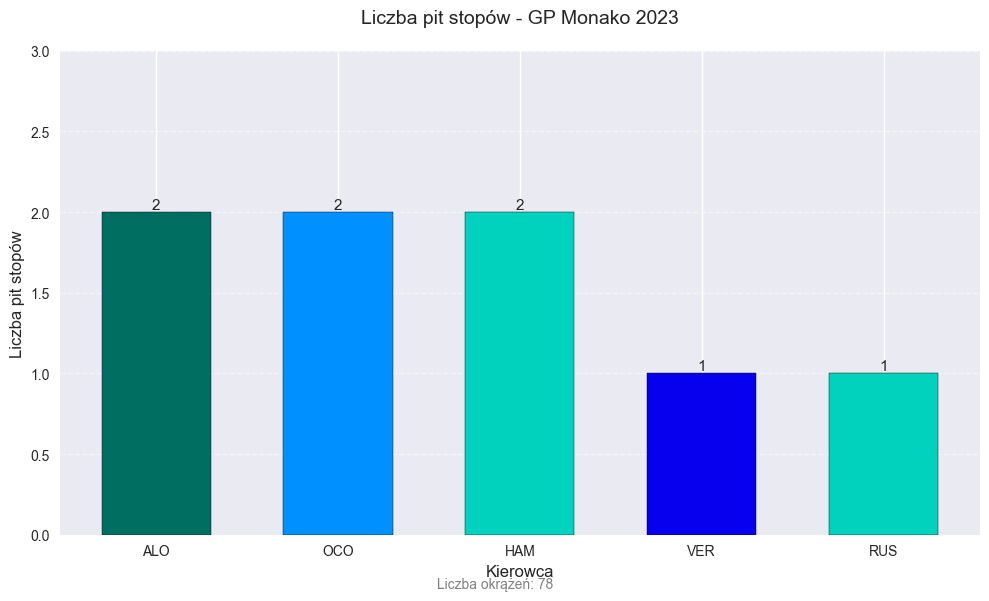

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

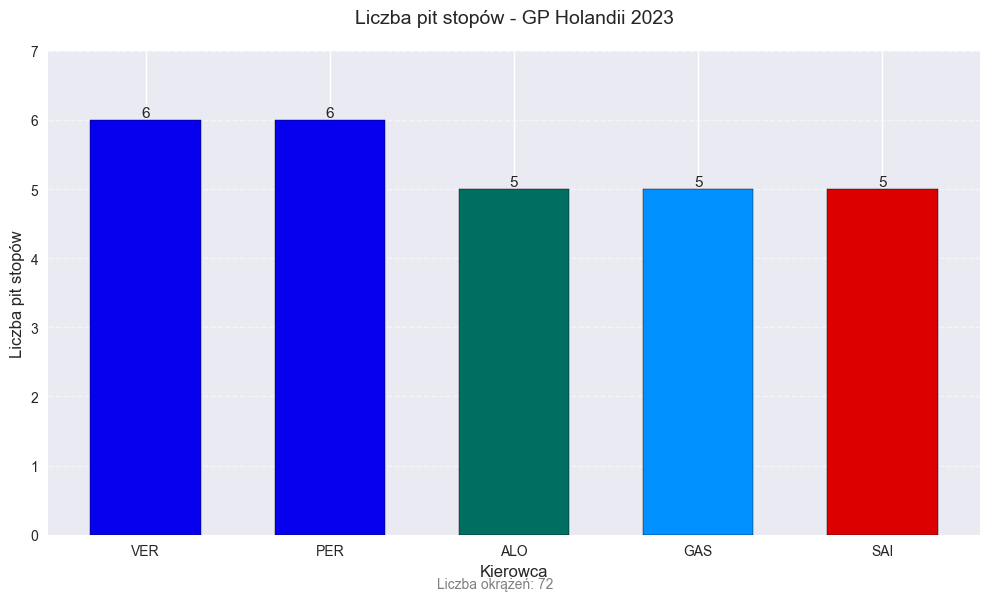

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.076000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '2

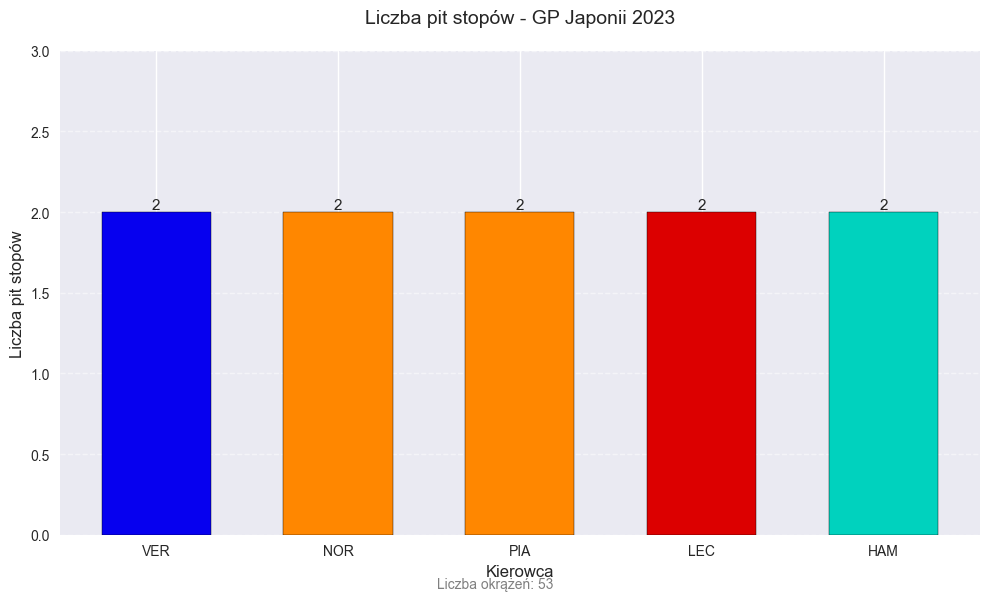

In [29]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd

# Inicjalizacja cache
fastf1.Cache.enable_cache('cache')

# Lista wyścigów
races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'GP Hiszpanii'},
    {'year': 2023, 'gp': 'Austria', 'label': 'GP Austrii'},
    {'year': 2023, 'gp': 'Italy', 'label': 'GP Włoch'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'GP Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': 'GP Holandii'},
    {'year': 2023, 'gp': 'Japan', 'label': 'GP Japonii'}
]

# Kolory dla kierowców
driver_colors = {
    'VER': '#0600EF',  # Red Bull - niebieski
    'PER': '#0600EF',  
    'LEC': '#DC0000',  # Ferrari - czerwony
    'SAI': '#DC0000',
    'HAM': '#00D2BE',  # Mercedes - turkus
    'RUS': '#00D2BE',
    'NOR': '#FF8700',  # McLaren - pomarańcz
    'PIA': '#FF8700',
    'ALO': '#006F62',  # Aston Martin - zielony
    'STR': '#006F62',
    'OCO': '#0090FF',  # Alpine - niebieski
    'GAS': '#0090FF',
    'TSU': '#2B4562',  # AlphaTauri - granat
    'DEV': '#2B4562',
    'BOT': '#900000',  # Alfa Romeo - bordowy
    'ZHO': '#900000',
    'MAG': '#FFFFFF',  # Haas - biały
    'HUL': '#FFFFFF',
    'ALB': '#005AFF',  # Williams - jasny niebieski
    'SAR': '#005AFF'
}

for race in races:
    try:
        # Pobranie danych
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        
        # Pobranie top 5 zawodników
        results = session.results[:5]
        drivers = results['Abbreviation'].tolist()
        
        # Przygotowanie danych
        pit_data = []
        for driver in drivers:
            laps = session.laps.pick_driver(driver)
            pit_stops = len(laps[laps['PitInTime'].notna()])
            pit_data.append({'Driver': driver, 'PitStops': pit_stops})
        
        # Tworzenie wykresu
        fig, ax = plt.subplots(figsize=(10, 6))
        
        # Sortowanie kierowców według liczby pit stopów (malejąco)
        pit_data_sorted = sorted(pit_data, key=lambda x: x['PitStops'], reverse=True)
        drivers_sorted = [x['Driver'] for x in pit_data_sorted]
        stops_sorted = [x['PitStops'] for x in pit_data_sorted]
        
        # Rysowanie słupków z kolorami zespołów
        bars = ax.bar(drivers_sorted, stops_sorted, 
                     color=[driver_colors.get(d, '#333333') for d in drivers_sorted],
                     edgecolor='black', width=0.6)
        
        # Dodanie wartości na słupkach
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{height}',
                   ha='center', va='bottom', fontsize=11)
        
        # Formatowanie wykresu
        ax.set_title(f'Liczba pit stopów - {race["label"]} 2023', fontsize=14, pad=20)
        ax.set_xlabel('Kierowca', fontsize=12)
        ax.set_ylabel('Liczba pit stopów', fontsize=12)
        ax.set_ylim(0, max(stops_sorted) + 1 if max(stops_sorted) > 0 else 2)
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        
        # Dodanie informacji o wyścigu
        plt.figtext(0.5, 0.01, f"Liczba okrążeń: {session.total_laps}", 
                   ha="center", fontsize=10, color='gray')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Błąd dla {race['label']}: {str(e)}")

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

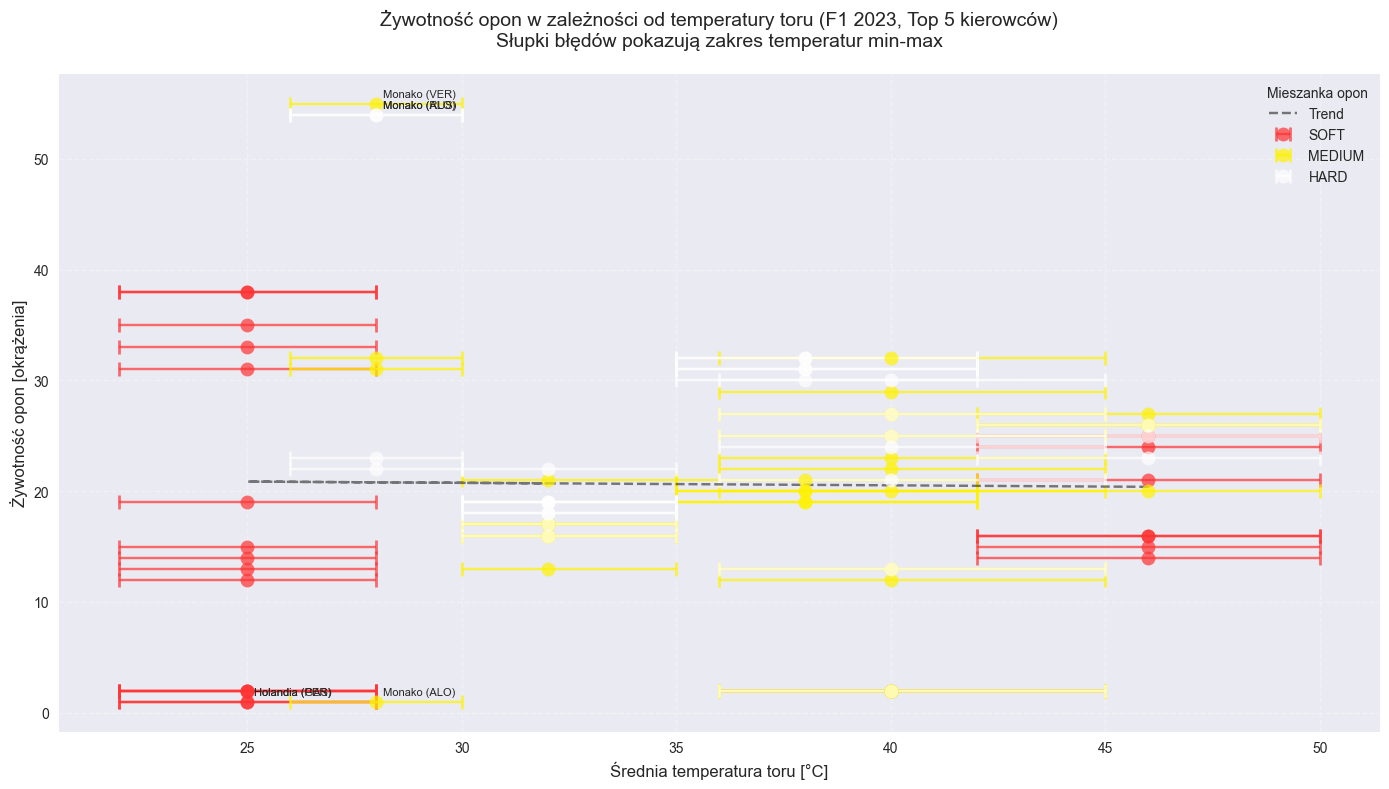

In [35]:
import fastf1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Inicjalizacja cache
fastf1.Cache.enable_cache('cache')

# Ręcznie zebrane dane o temperaturach toru [min, avg, max]
race_temps = {
    'Spain': {'min': 42, 'avg': 46, 'max': 50, 'label': 'Hiszpania'},
    'Austria': {'min': 36, 'avg': 40, 'max': 45, 'label': 'Austria'},
    'Italy': {'min': 35, 'avg': 38, 'max': 42, 'label': 'Włochy (Monza)'},
    'Monaco': {'min': 26, 'avg': 28, 'max': 30, 'label': 'Monako'},
    'Netherlands': {'min': 22, 'avg': 25, 'max': 28, 'label': 'Holandia'},
    'Japan': {'min': 30, 'avg': 32, 'max': 35, 'label': 'Japonia (Suzuka)'}
}

# Przygotowanie danych
all_data = []

for gp_name, temps in race_temps.items():
    try:
        session = fastf1.get_session(2023, gp_name, 'R')
        session.load()
        
        # Pobierz top 5 kierowców
        results = session.results[:5]
        
        for driver in results['Abbreviation']:
            laps = session.laps.pick_driver(driver)
            
            # Oblicz żywotność opon dla każdego stintu
            stints = laps[['LapNumber', 'Compound', 'Stint']].drop_duplicates()
            stint_lengths = stints.groupby(['Stint', 'Compound'])['LapNumber'].count().reset_index()
            
            for _, stint in stint_lengths.iterrows():
                if stint['Compound'] in ['SOFT', 'MEDIUM', 'HARD']:
                    all_data.append({
                        'Race': temps['label'],
                        'Driver': driver,
                        'Compound': stint['Compound'],
                        'Lifespan': stint['LapNumber'],
                        'Temp_avg': temps['avg'],
                        'Temp_min': temps['min'],
                        'Temp_max': temps['max']
                    })
                    
    except Exception as e:
        print(f"❌ Błąd dla {gp_name}: {str(e)}")

# Konwersja do DataFrame
df = pd.DataFrame(all_data)

# Tworzenie wykresu
plt.figure(figsize=(14, 8))

# Kolory dla mieszanek opon
compound_colors = {
    'SOFT': '#FF3333',  # Czerwony
    'MEDIUM': '#FFF200',  # Żółty
    'HARD': '#FFFFFF'  # Biały
}

# Stały rozmiar markerów
marker_size = 100

# Wykres punktowy z zakresami temperatur
for compound in ['SOFT', 'MEDIUM', 'HARD']:
    subset = df[df['Compound'] == compound]
    if not subset.empty:
        # Konwersja danych do list
        x = subset['Temp_avg'].tolist()
        y = subset['Lifespan'].tolist()
        xerr = [subset['Temp_avg']-subset['Temp_min'], subset['Temp_max']-subset['Temp_avg']]
        
        plt.errorbar(
            x=x,
            y=y,
            xerr=xerr,
            fmt='o',
            color=compound_colors[compound],
            markersize=marker_size/10,  # Stały rozmiar
            capsize=5,
            capthick=2,
            label=compound,
            alpha=0.7
        )

# Linia trendu
if not df.empty:
    z = np.polyfit(df['Temp_avg'], df['Lifespan'], 1)
    p = np.poly1d(z)
    plt.plot(df['Temp_avg'], p(df['Temp_avg']), "k--", alpha=0.5, label='Trend')

# Formatowanie wykresu
plt.title('Żywotność opon w zależności od temperatury toru (F1 2023, Top 5 kierowców)\n'
          'Słupki błędów pokazują zakres temperatur min-max', fontsize=14, pad=20)
plt.xlabel('Średnia temperatura toru [°C]', fontsize=12)
plt.ylabel('Żywotność opon [okrążenia]', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Mieszanka opon')

# Dodanie etykiet dla skrajnych przypadków
if not df.empty:
    for _, row in df.nlargest(3, 'Lifespan').iterrows():
        plt.annotate(f"{row['Race']} ({row['Driver']})", 
                    (row['Temp_avg'], row['Lifespan']),
                    textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)
    
    for _, row in df.nsmallest(3, 'Lifespan').iterrows():
        plt.annotate(f"{row['Race']} ({row['Driver']})", 
                    (row['Temp_avg'], row['Lifespan']),
                    textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.tight_layout()
plt.show()

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

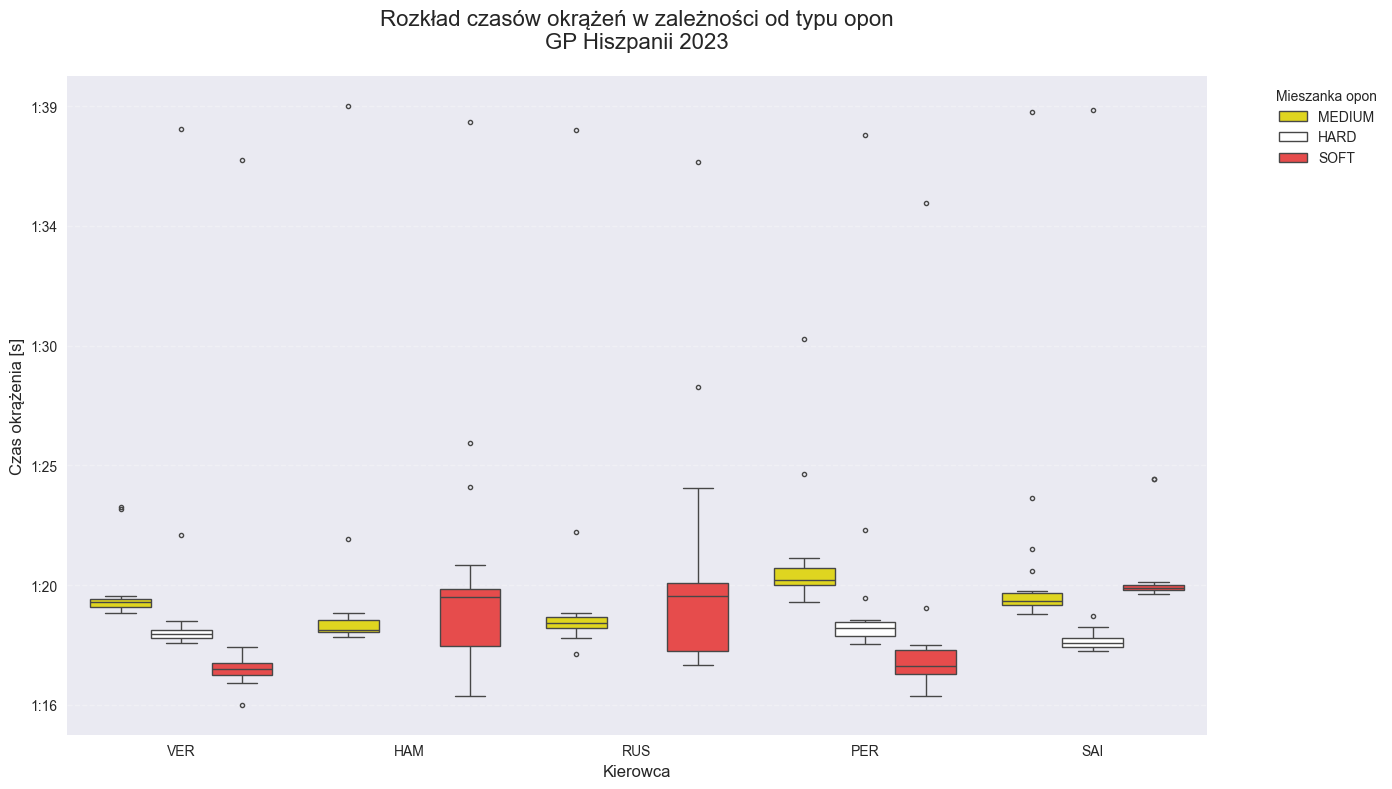

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


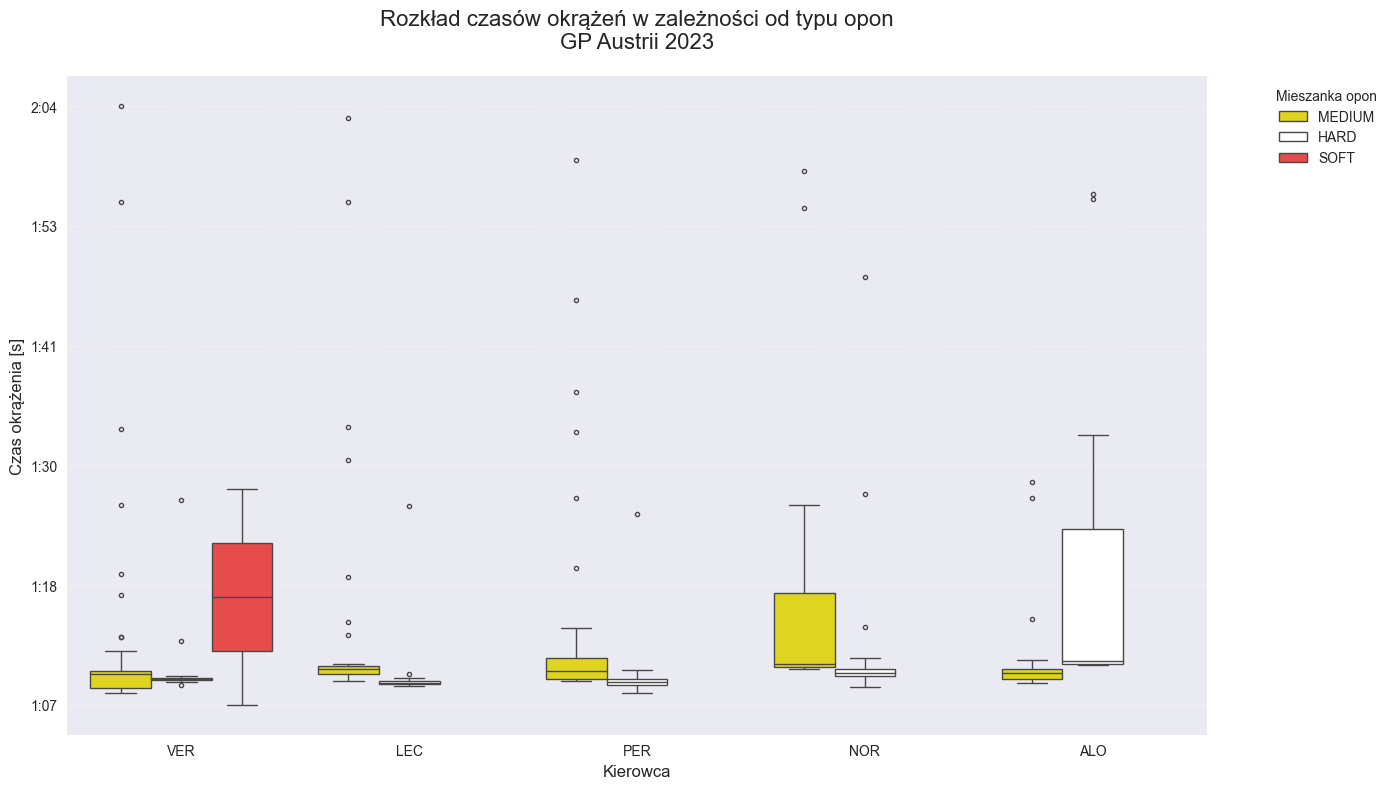

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

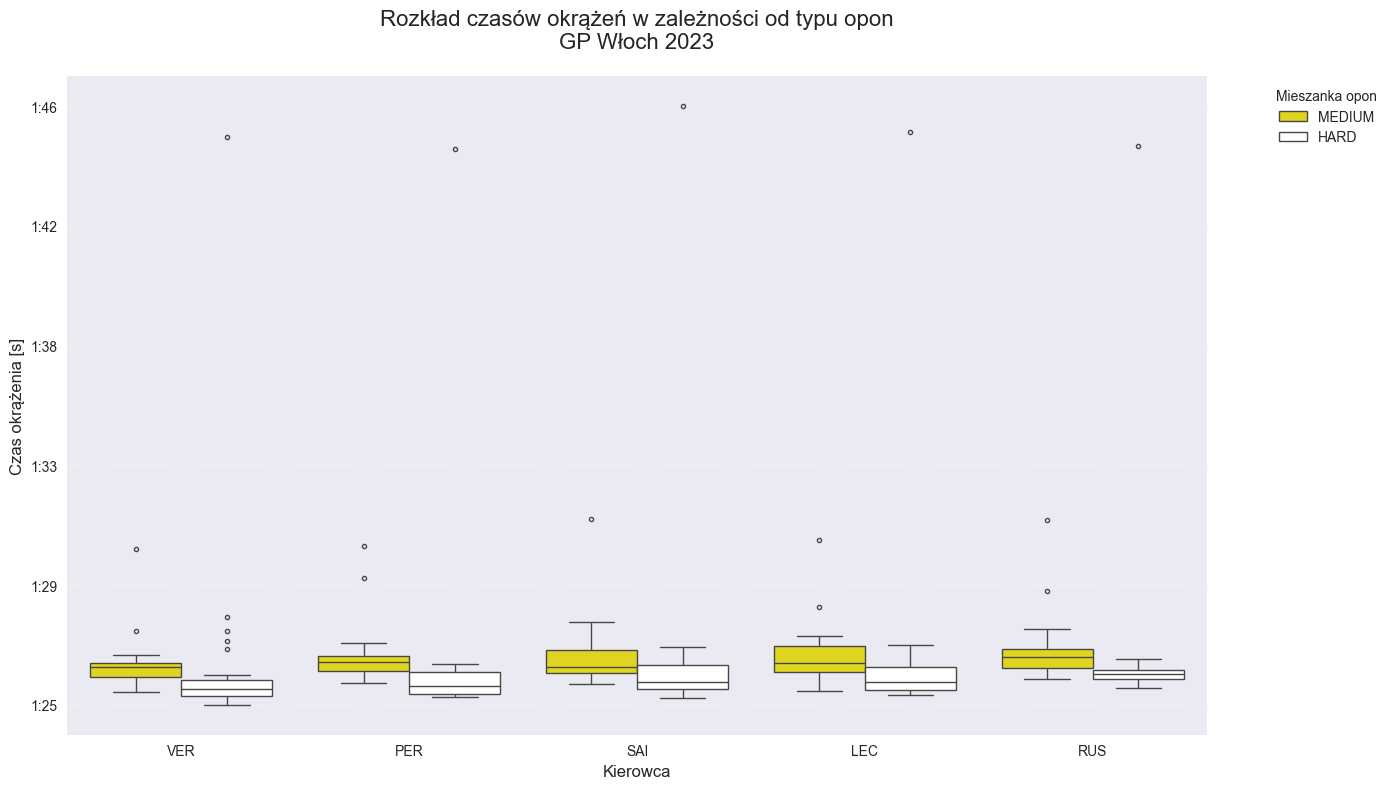

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


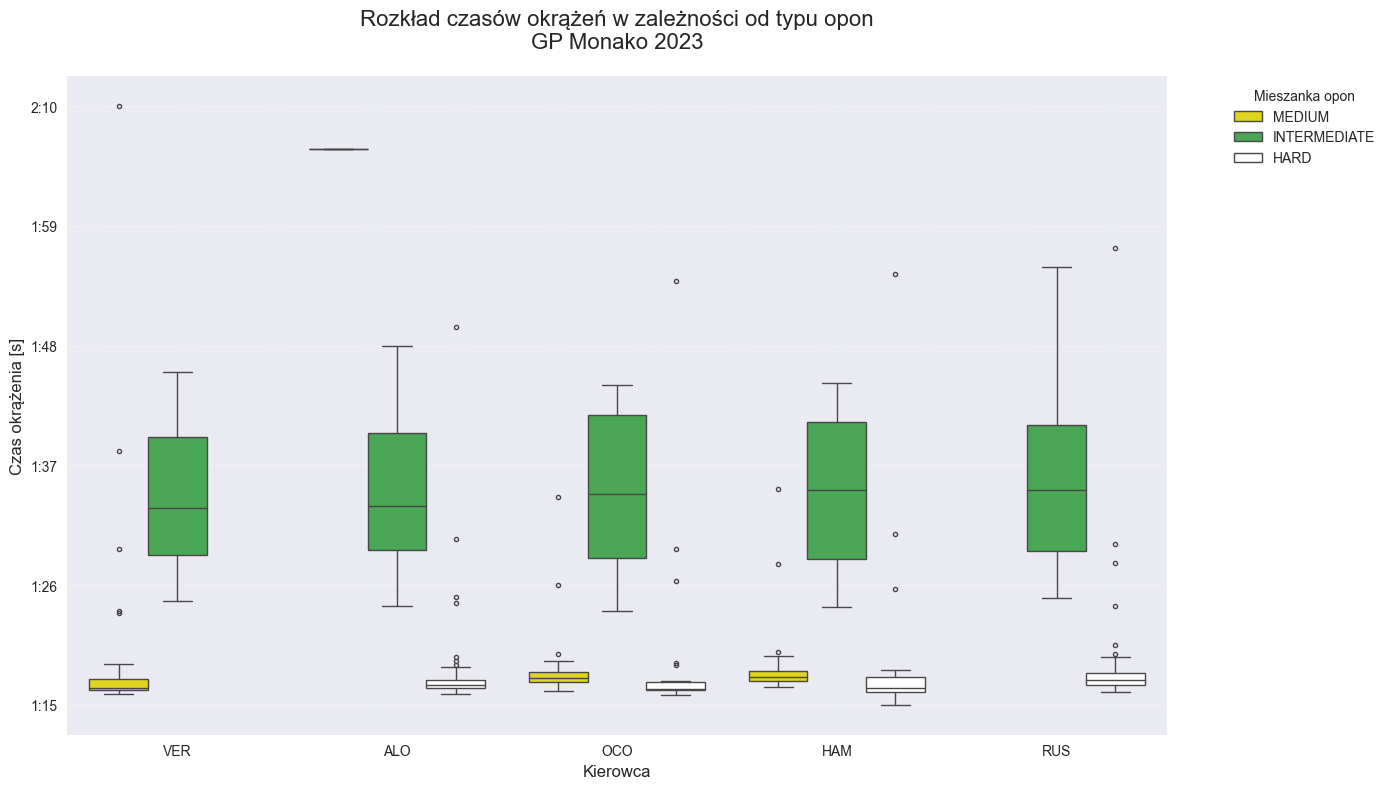

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

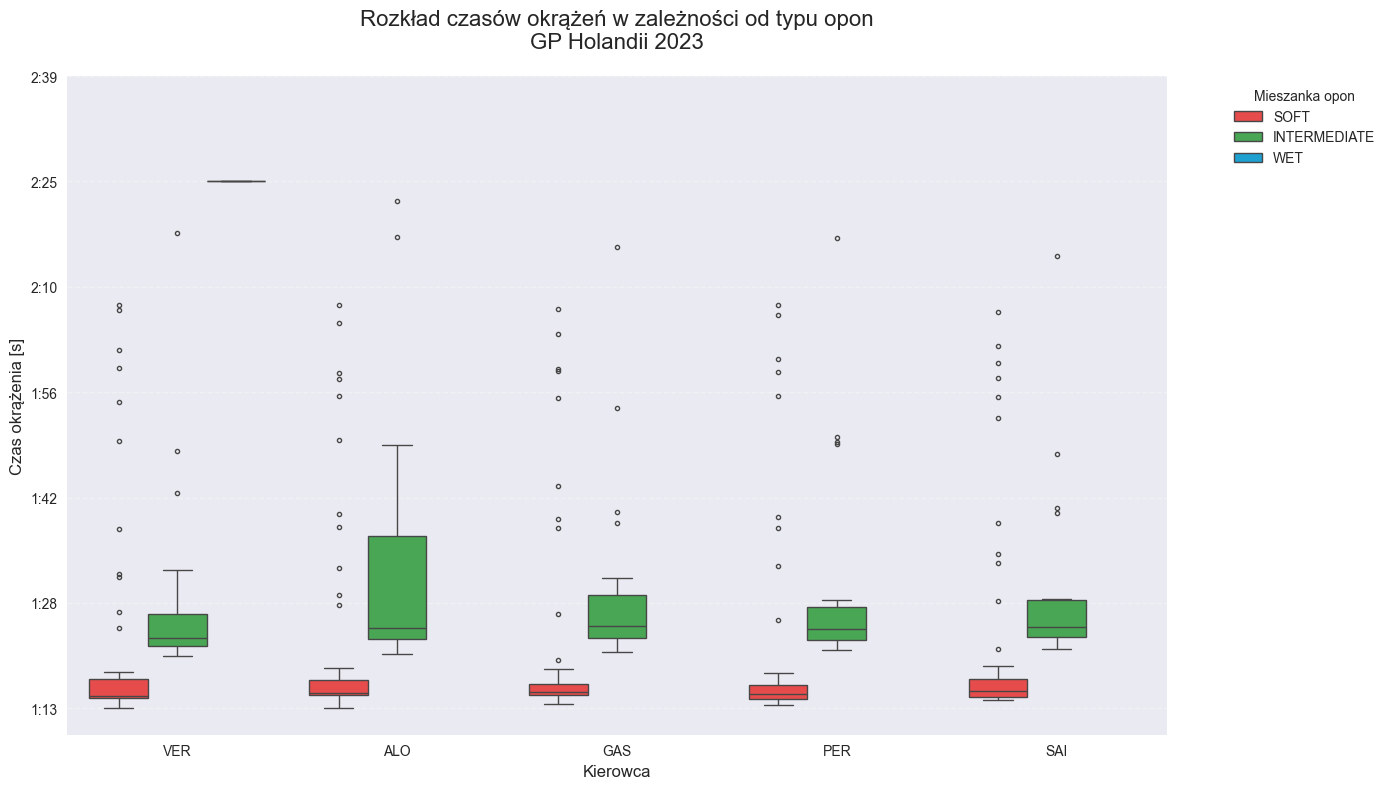

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.076000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '2

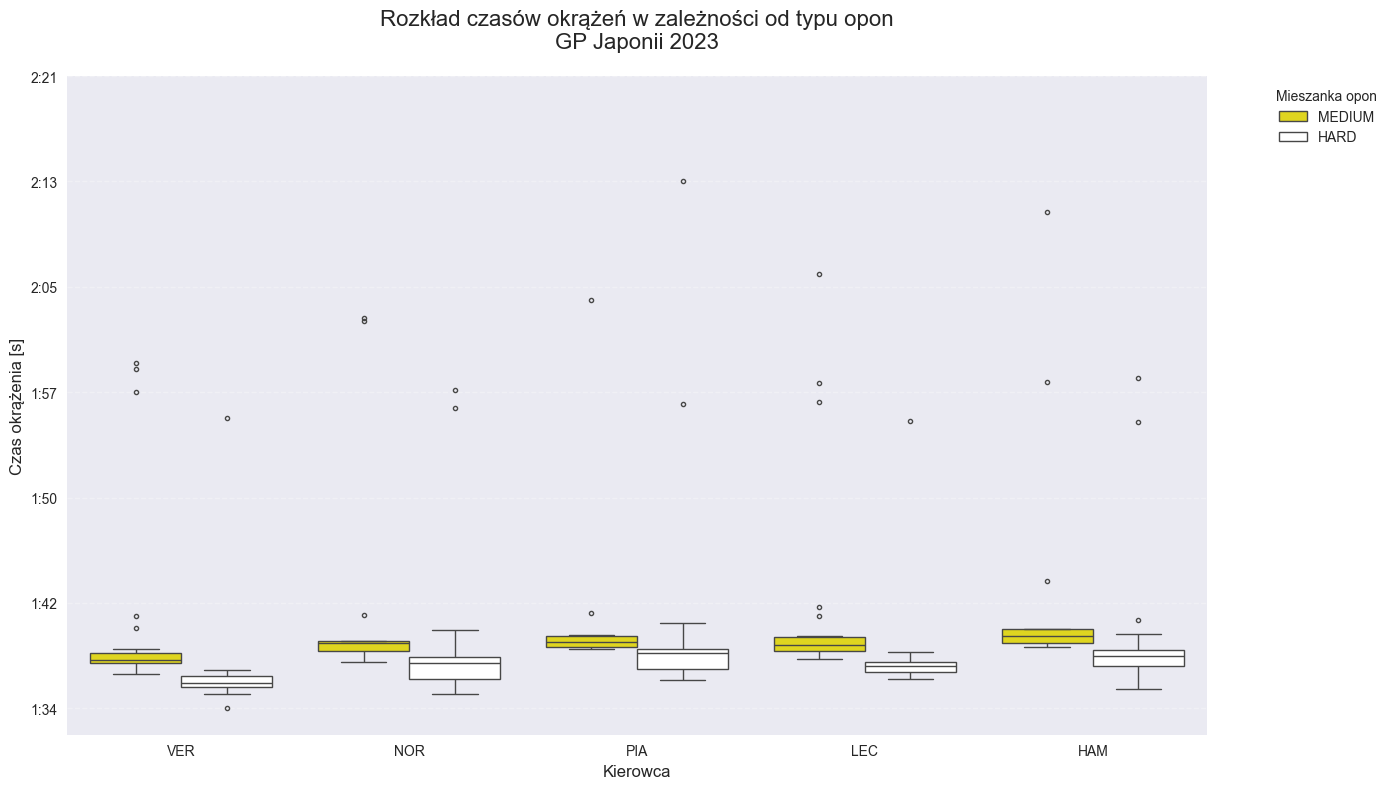

In [41]:
import fastf1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Inicjalizacja cache
fastf1.Cache.enable_cache('cache')

# Lista wyścigów
races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'GP Hiszpanii'},
    {'year': 2023, 'gp': 'Austria', 'label': 'GP Austrii'},
    {'year': 2023, 'gp': 'Italy', 'label': 'GP Włoch'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'GP Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': 'GP Holandii'},
    {'year': 2023, 'gp': 'Japan', 'label': 'GP Japonii'}
]

# Kolory dla mieszanek opon
tyre_colors = {
    'SOFT': '#FF3333',    # Czerwony
    'MEDIUM': '#FFF200',  # Żółty
    'HARD': '#FFFFFF',    # Biały
    'INTERMEDIATE': '#39B54A', # Zielony
    'WET': '#00AEEF'      # Niebieski
}

for race in races:
    try:
        # Pobranie danych
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        
        # Pobranie top 5 zawodników
        results = session.results[:5]
        drivers = results['Abbreviation'].tolist()
        
        # Przygotowanie danych
        lap_times = []
        for driver in drivers:
            laps = session.laps.pick_drivers([driver])
            for _, lap in laps.iterlaps():
                if pd.notna(lap['Compound']) and pd.notna(lap['LapTime']):
                    lap_times.append({
                        'Driver': driver,
                        'Compound': lap['Compound'],
                        'LapTime': lap['LapTime'].total_seconds(),
                        'Position': lap['Position']
                    })
        
        df = pd.DataFrame(lap_times)
        
        if df.empty:
            print(f"⚠️ Brak danych o czasach okrążeń dla {race['label']}")
            continue
            
        # Tworzenie wykresu
        plt.figure(figsize=(14, 8))
        
        # Wykres pudełkowy
        sns.boxplot(
            data=df,
            x='Driver',
            y='LapTime',
            hue='Compound',
            palette=tyre_colors,
            dodge=True,
            width=0.8,
            linewidth=1,
            fliersize=3
        )
        
        # Formatowanie wykresu
        plt.title(f'Rozkład czasów okrążeń w zależności od typu opon\n{race["label"]} 2023', 
                 fontsize=16, pad=20)
        plt.xlabel('Kierowca', fontsize=12)
        plt.ylabel('Czas okrążenia [s]', fontsize=12)
        
        # Konwersja czasu na format MM:SS
        max_time = df['LapTime'].max()
        min_time = df['LapTime'].min()
        step = (max_time - min_time) / 5
        y_ticks = np.arange(min_time, max_time + step, step)
        plt.yticks(y_ticks, [f"{int(t//60)}:{int(t%60):02d}" for t in y_ticks])
        
        plt.grid(axis='y', linestyle='--', alpha=0.3)
        plt.legend(title='Mieszanka opon', bbox_to_anchor=(1.05, 1), loc='upper left')
        
        # Dodanie informacji o pozycji
        # for i, driver in enumerate(drivers):
        #     driver_pos = results[results['Abbreviation'] == driver]['Position'].values[0]
        #     plt.text(i, min_time-5, f"P{driver_pos}", 
        #             ha='center', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Błąd dla {race['label']}: {str(e)}")

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

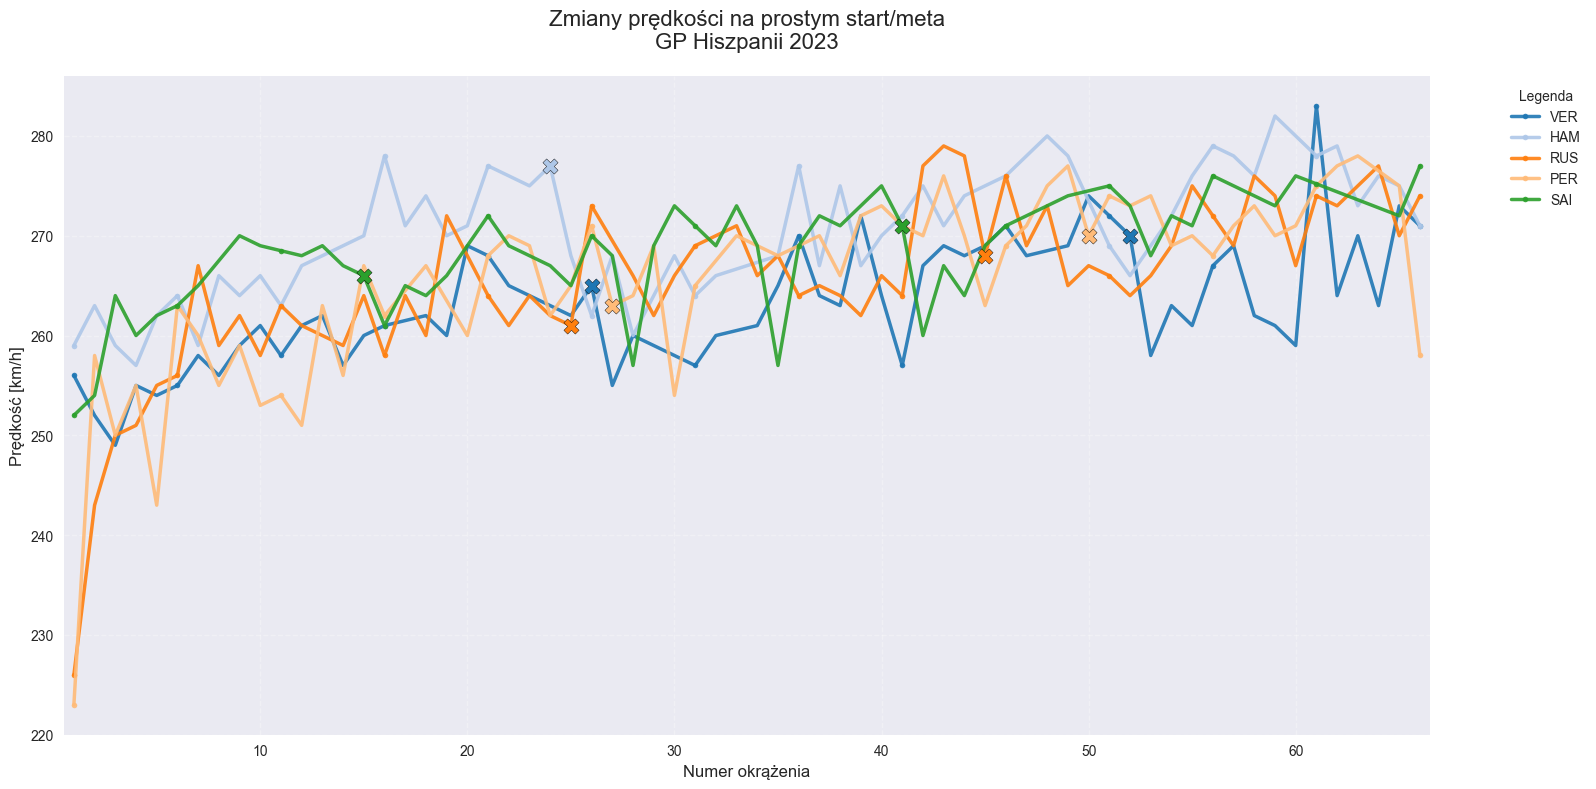

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


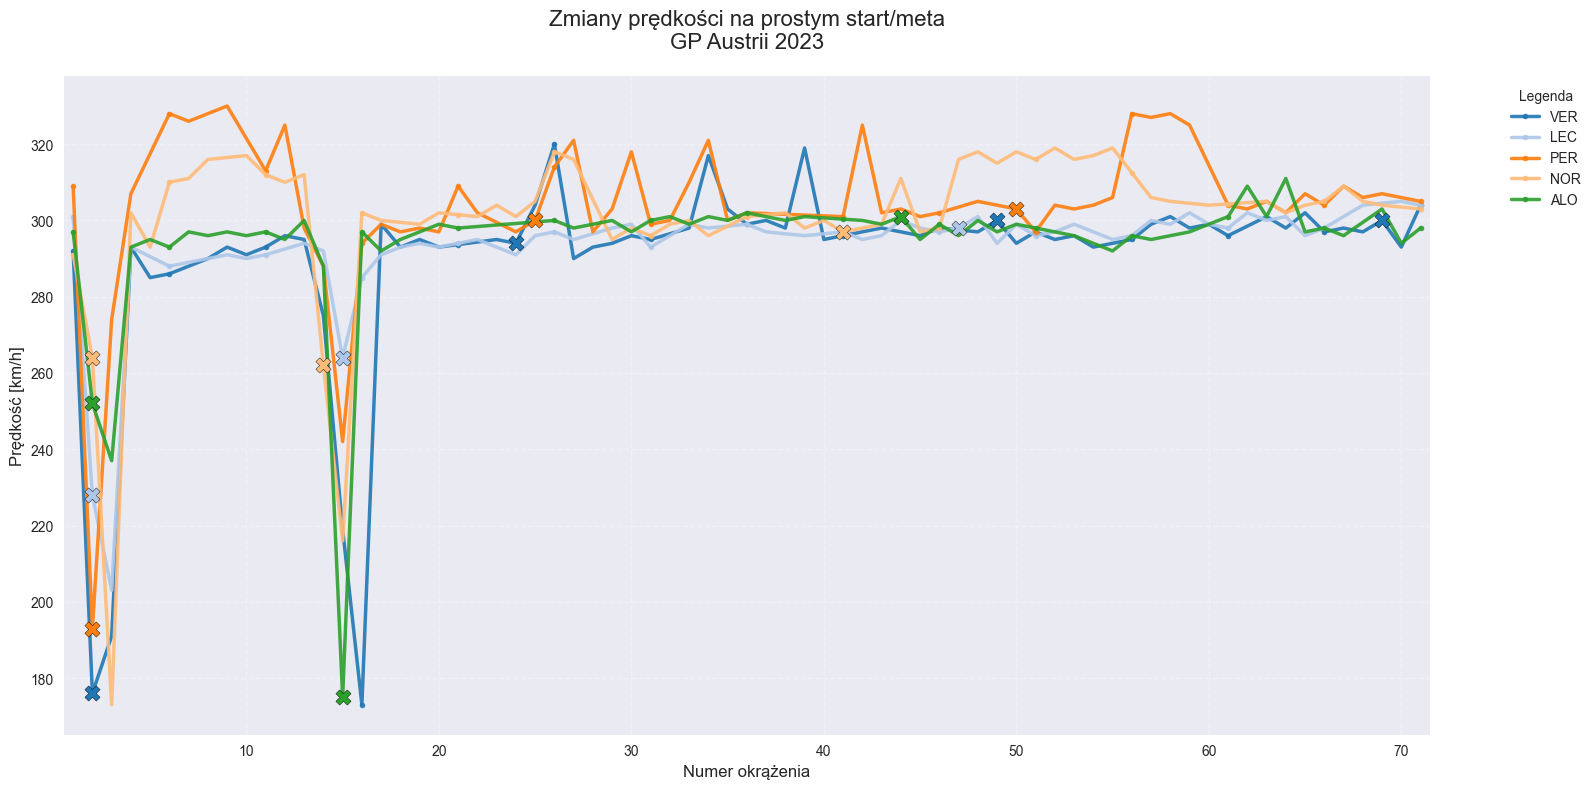

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

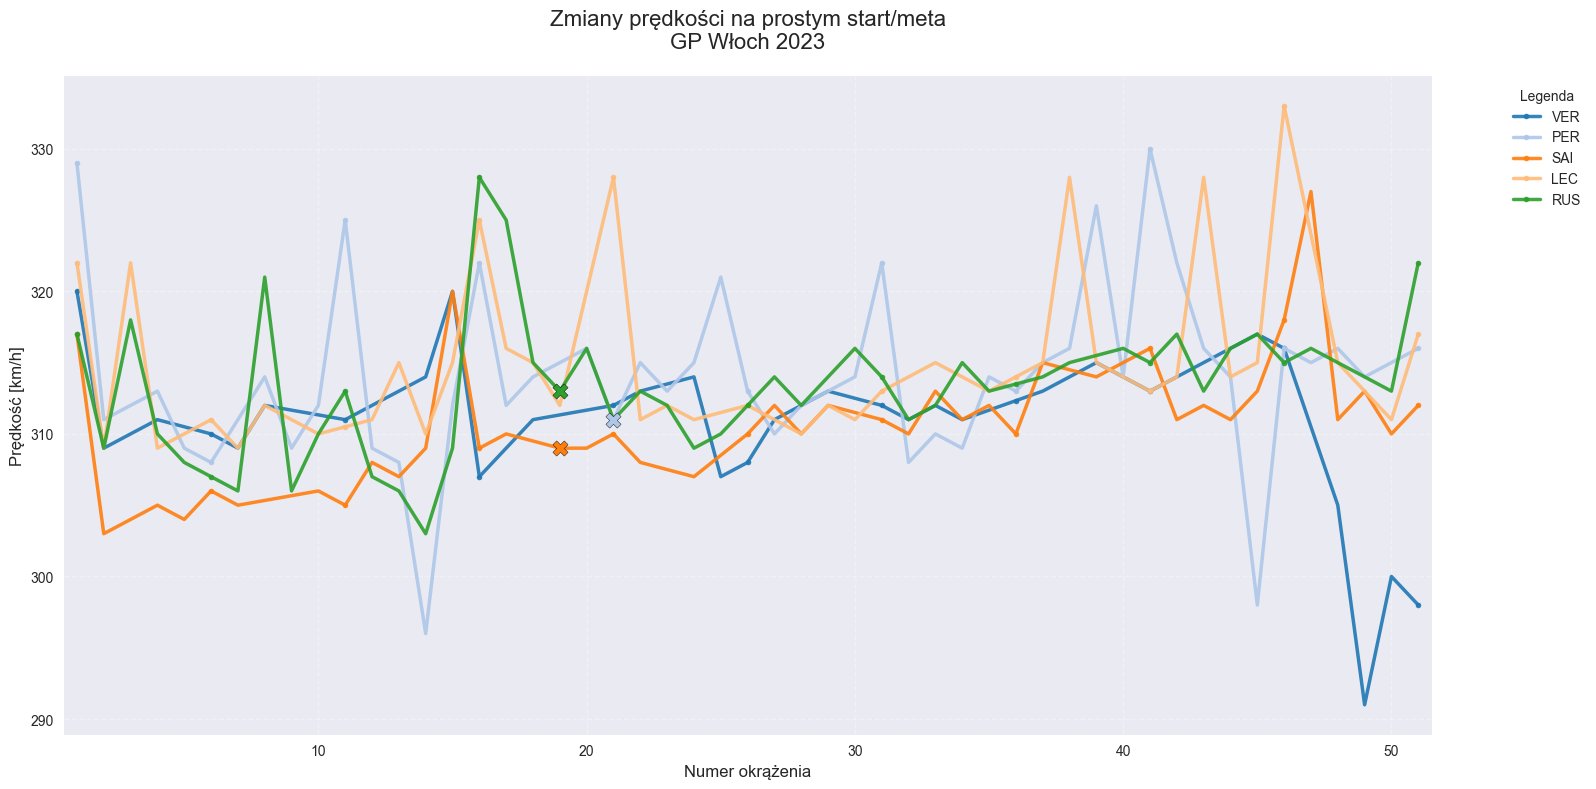

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


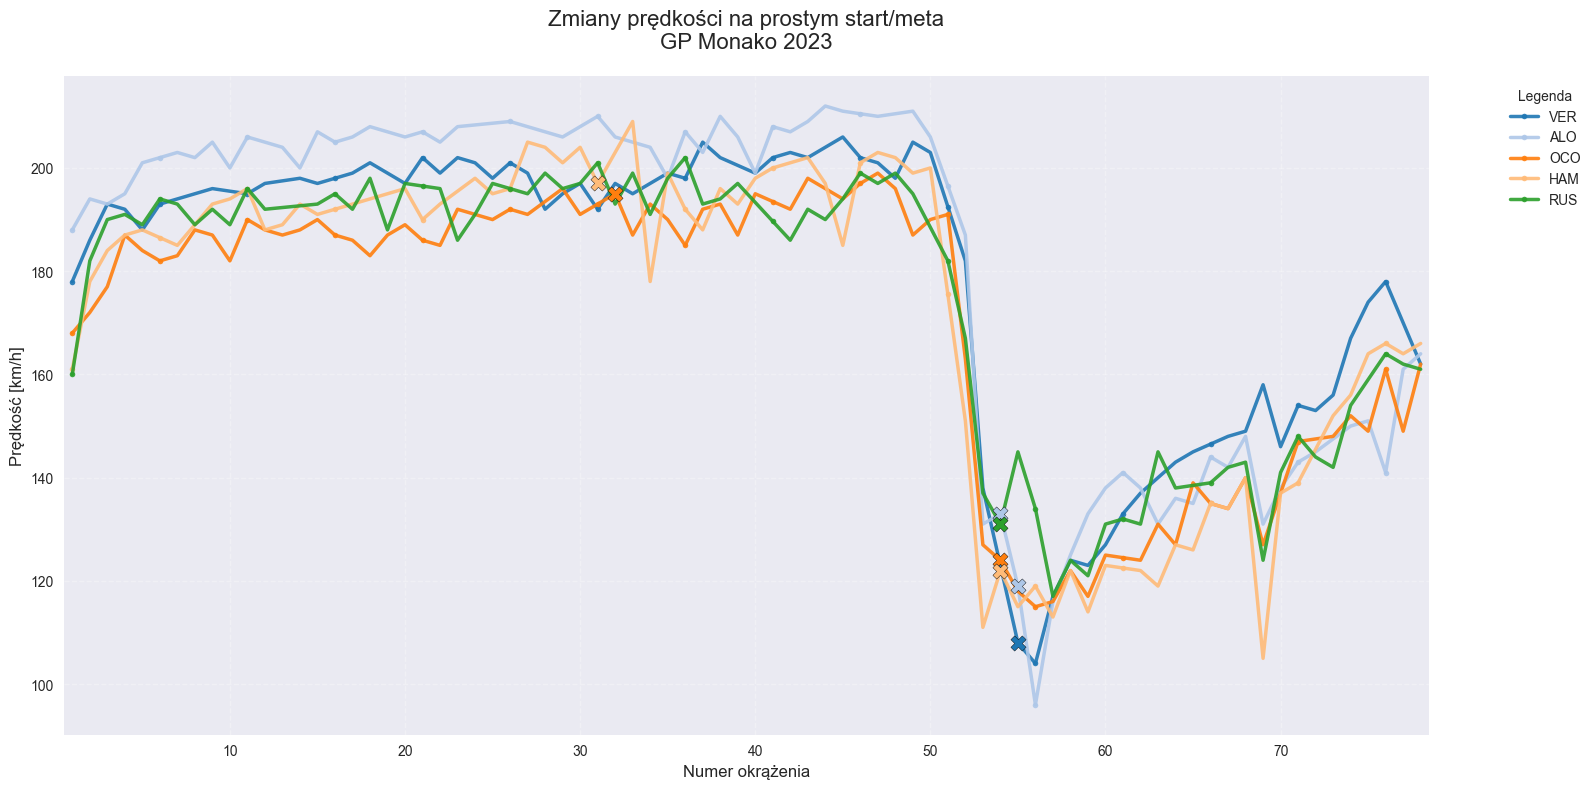

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

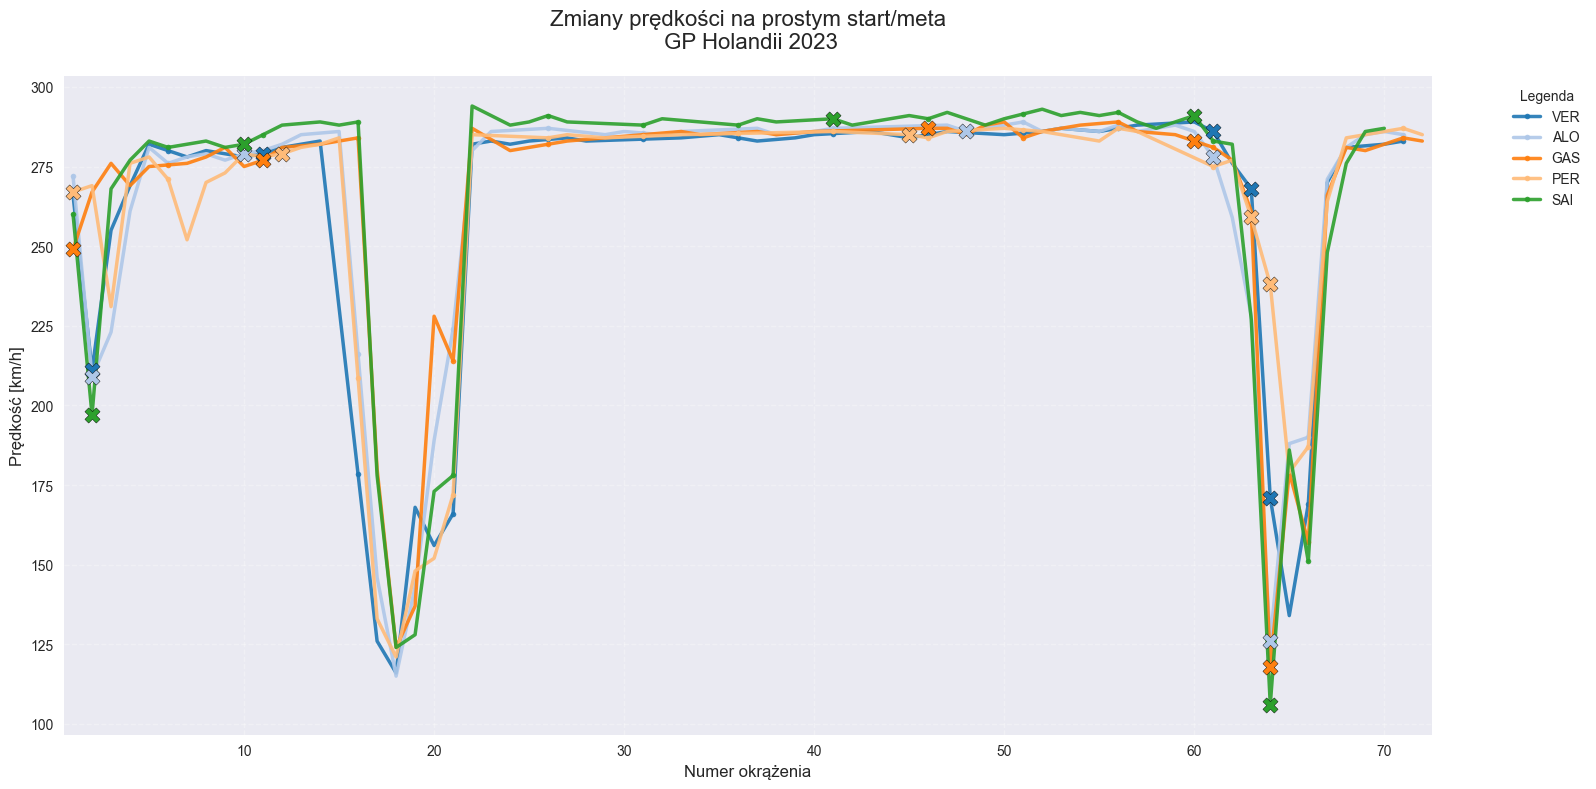

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


In [ ]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Inicjalizacja cache
fastf1.Cache.enable_cache('cache')

# Lista wyścigów
races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'GP Hiszpanii'},
    {'year': 2023, 'gp': 'Austria', 'label': 'GP Austrii'},
    {'year': 2023, 'gp': 'Italy', 'label': 'GP Włoch'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'GP Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': ' GP Holandii'},
    {'year': 2023, 'gp': 'Japan', 'label': 'GP Japonii'}
]

# Unikalne kolory dla każdego kierowcy
cmap = ListedColormap(plt.cm.tab20.colors + plt.cm.tab20b.colors)

for race in races:
    try:
        # Pobranie danych
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        
        # Pobranie zdarzeń wyścigowych (nowa metoda)
        race_control = session.race_control_messages
        safety_car = race_control[race_control['Message'].str.contains('Safety Car', na=False)]
        yellow_flags = race_control[race_control['Message'].str.contains('Yellow Flag', na=False)]
        
        # Pobranie top 5 zawodników
        results = session.results[:5]
        drivers = results['Abbreviation'].tolist()
        
        # Przygotowanie wykresu
        plt.figure(figsize=(16, 8))
        
        # Dla każdego kierowcy
        for i, driver in enumerate(drivers):
            # Pobranie okrążeń kierowcy
            laps = session.laps.pick_drivers([driver]).reset_index(drop=True)
            
            # Interpolacja brakujących danych
            complete_laps = pd.DataFrame({'LapNumber': range(1, session.total_laps+1)})
            merged = complete_laps.merge(laps[['LapNumber', 'SpeedI1']], on='LapNumber', how='left')
            merged['SpeedI1'] = merged['SpeedI1'].interpolate(limit_area='inside')
            
            # Rysowanie linii prędkości
            plt.plot(
                merged['LapNumber'],
                merged['SpeedI1'],
                label=f"{driver}",
                color=cmap(i),
                linewidth=2.5,
                alpha=0.9,
                marker='o',
                markersize=4,
                markevery=5
            )
            
            # Zaznaczenie pit stopów
            pit_stops = laps[laps['PitInTime'].notna()]
            for _, pit_lap in pit_stops.iterrows():
                plt.scatter(
                    pit_lap['LapNumber'],
                    pit_lap['SpeedI1'],
                    color=cmap(i),
                    edgecolor='black',
                    s=120,
                    zorder=5,
                    marker='X'
                )
        
        # Dodanie oznaczeń Safety Car i żółtych flag
        for _, sc in safety_car.iterrows():
            lap = pd.to_numeric(sc['LapNumber'], errors='coerce')
            if not pd.isna(lap):
                plt.axvspan(
                    lap - 0.5,
                    lap + 0.5,
                    color='yellow',
                    alpha=0.3,
                    label='Safety Car' if sc.name == safety_car.index[0] else ""
                )
        
        for _, yf in yellow_flags.iterrows():
            lap = pd.to_numeric(yf['LapNumber'], errors='coerce')
            if not pd.isna(lap):
                plt.axvspan(
                    lap - 0.5,
                    lap + 0.5,
                    color='orange',
                    alpha=0.2,
                    hatch='//',
                    label='Yellow Flag' if yf.name == yellow_flags.index[0] else ""
                )
        
        # Formatowanie wykresu
        plt.title(f'Zmiany prędkości na prostym start/meta\n{race["label"]} 2023',
                fontsize=16, pad=20)
        plt.xlabel('Numer okrążenia', fontsize=12)
        plt.ylabel('Prędkość [km/h]', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.3)
        
        # Ustawienie zakresu osi X
        plt.xlim(0.5, session.total_laps + 0.5)
        
        # Legenda
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(
            by_label.values(),
            by_label.keys(),
            title='Legenda',
            bbox_to_anchor=(1.05, 1),
            loc='upper left'
        )
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Błąd dla {race['label']}: {str(e)}")

core           INFO 	Loading data for Spanish Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.037000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '44', '63', '11', '55', '18', '14', '31', '24', '10', '16', '2

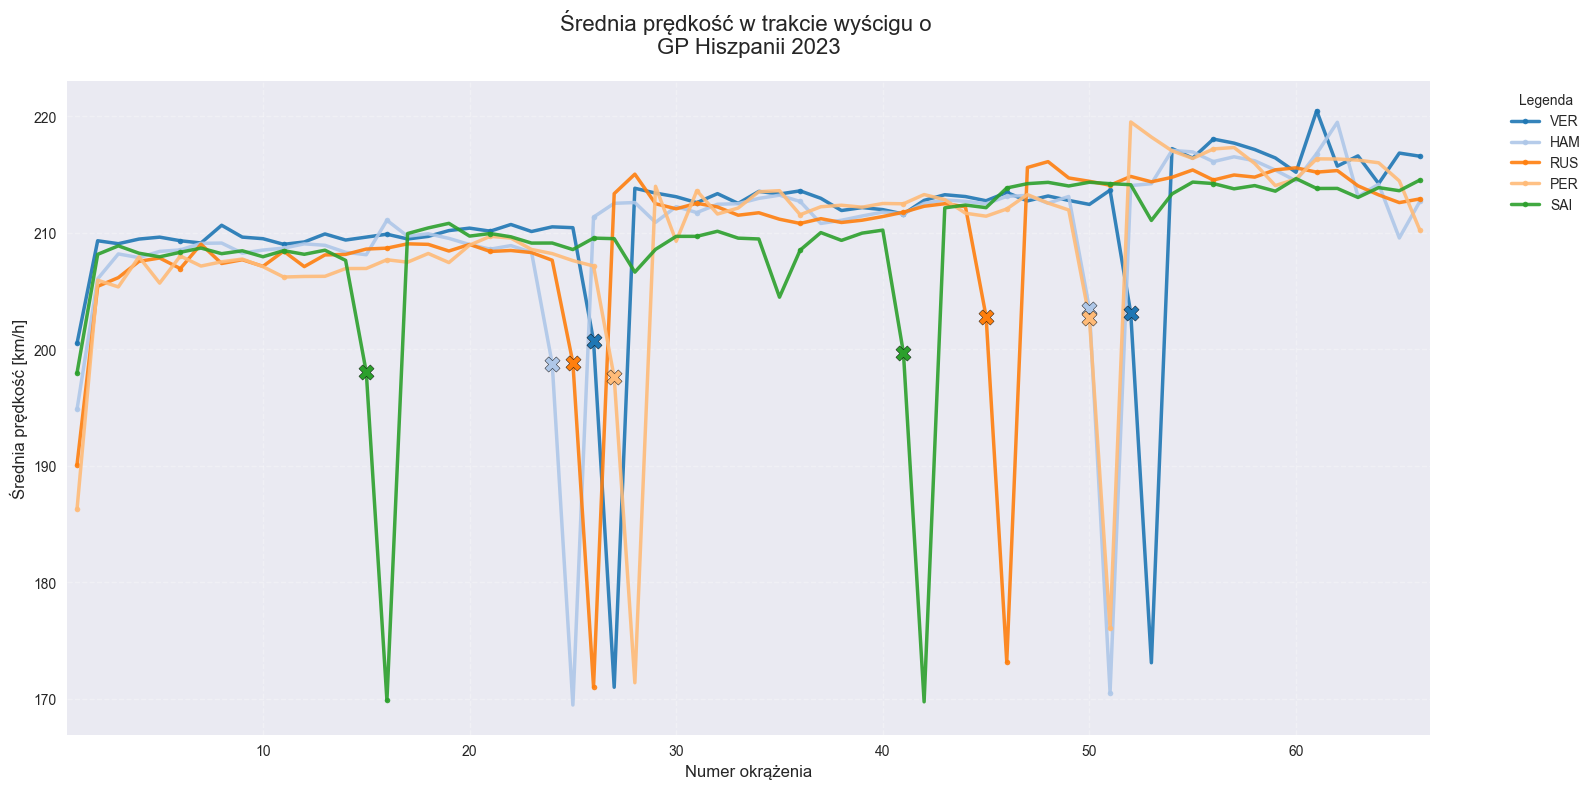

core           INFO 	Loading data for Austrian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


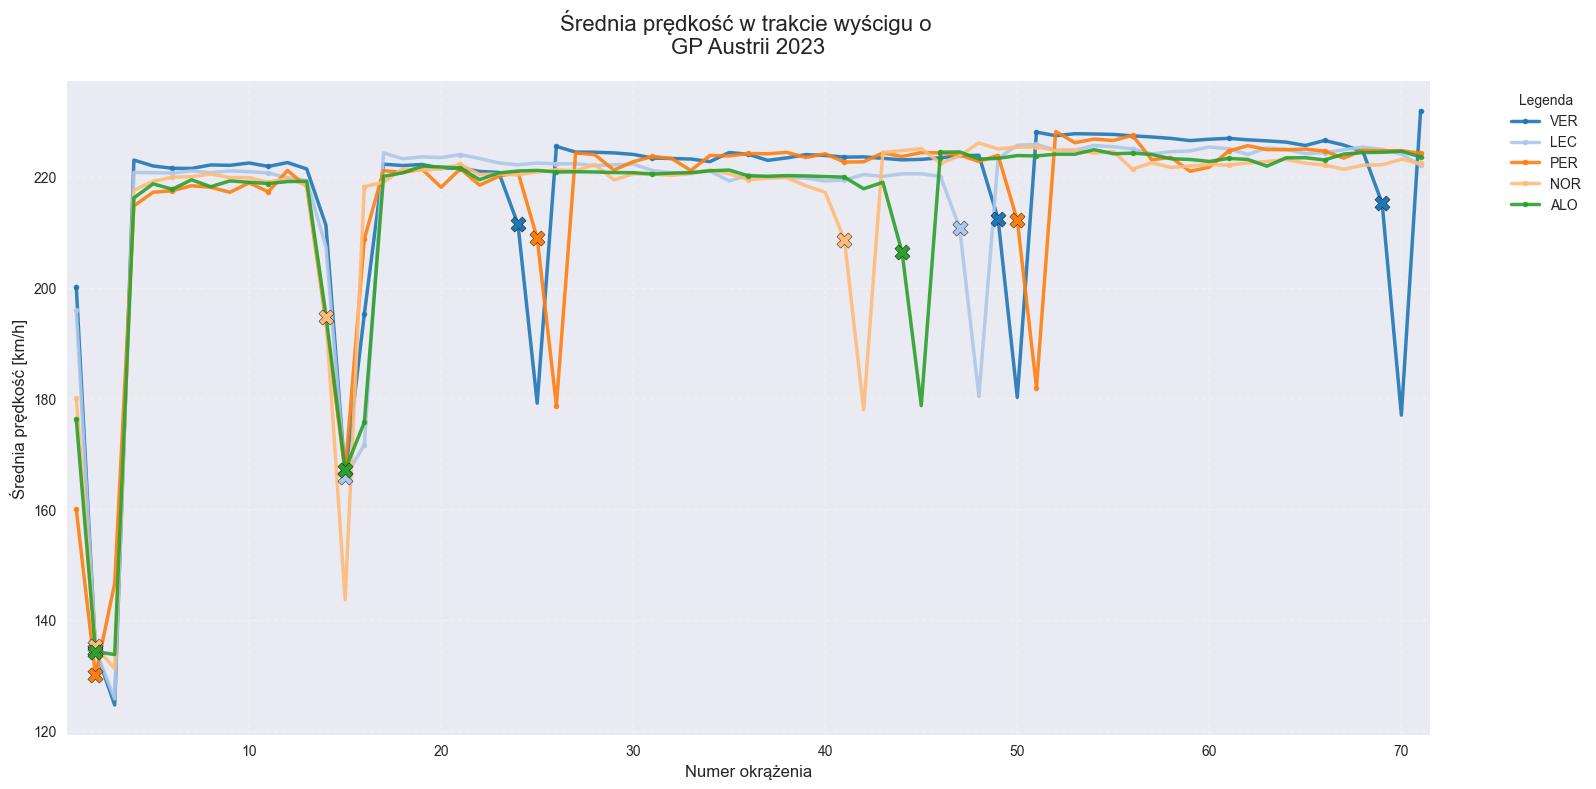

core           INFO 	Loading data for Italian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WAR

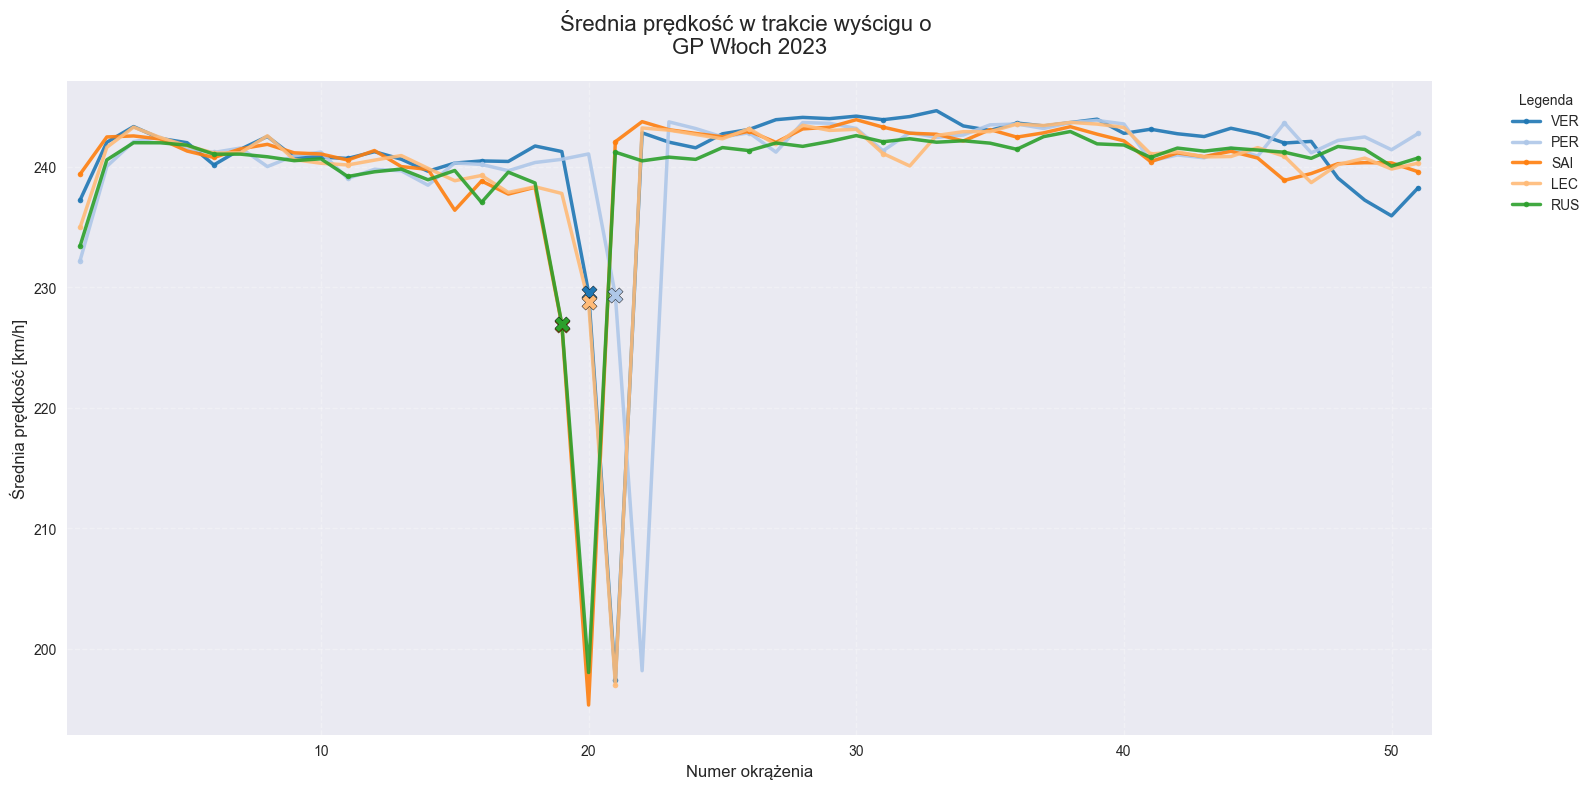

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


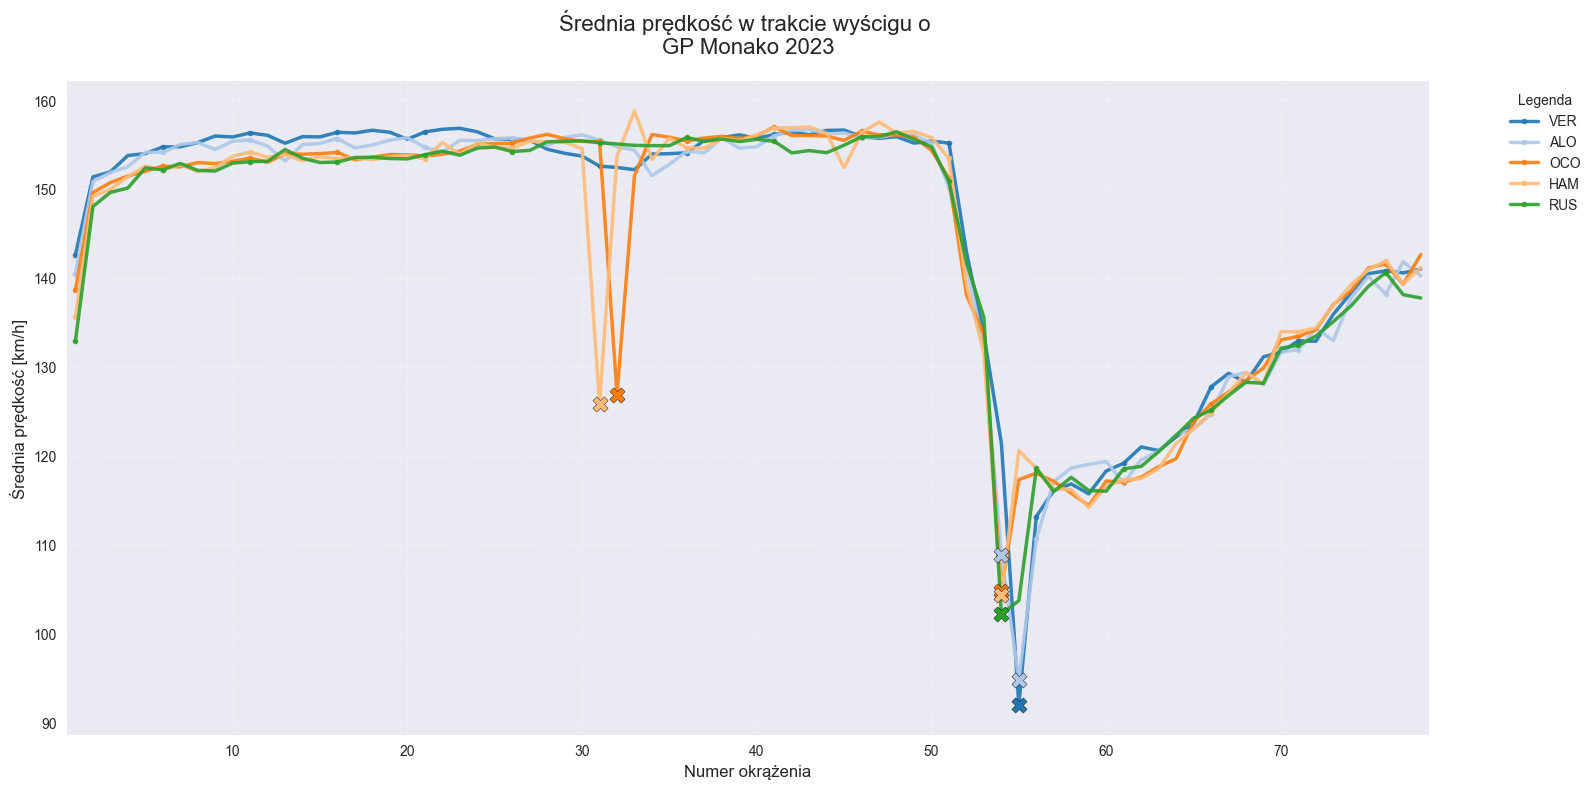

core           INFO 	Loading data for Dutch Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:02.059000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '10', '11', '55', '44', '4', '23', '81', '31', '18', '27',

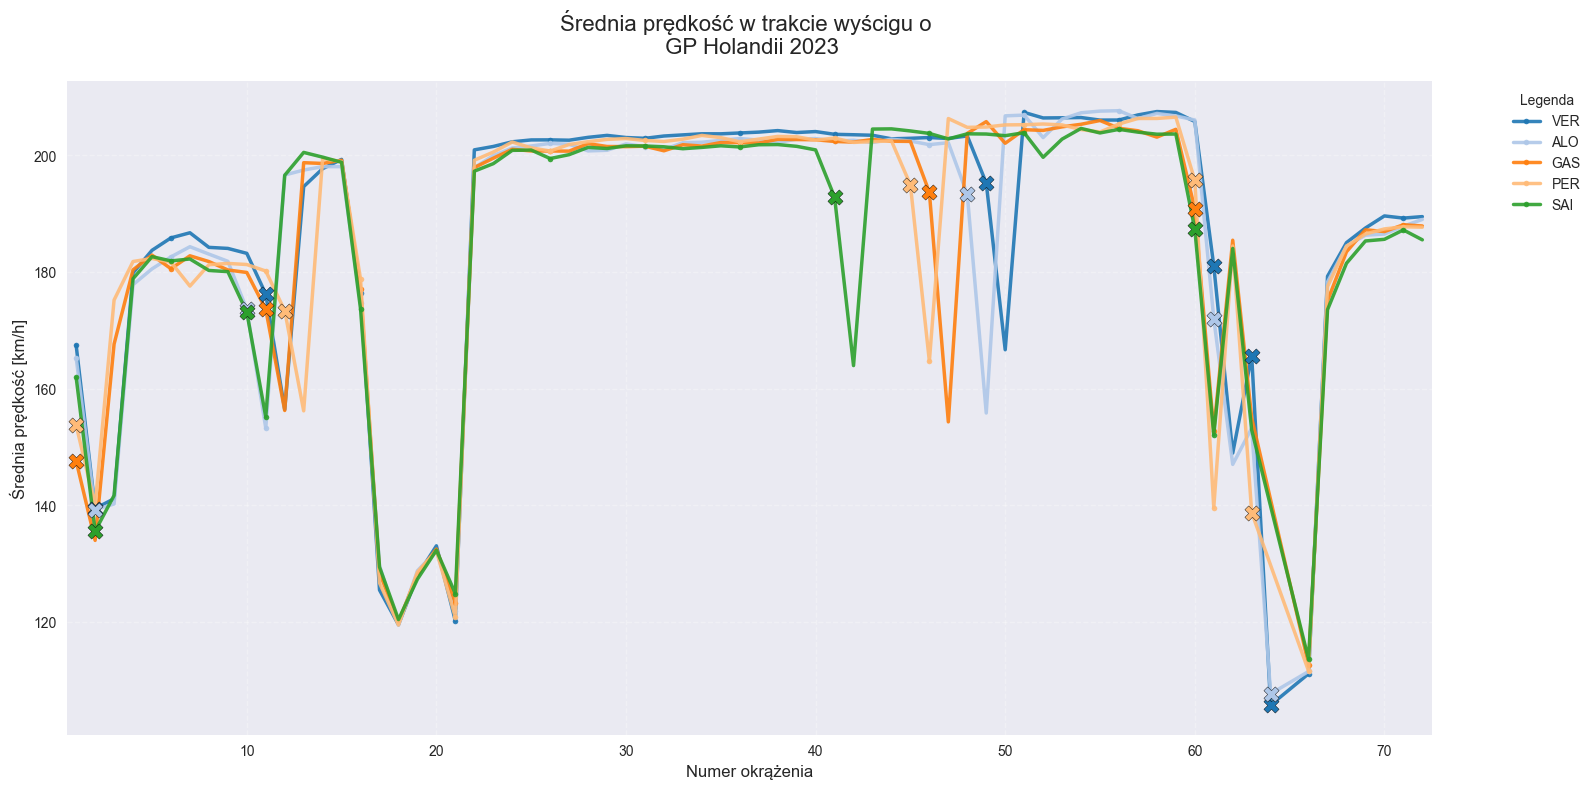

core           INFO 	Loading data for Japanese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 00:00.076000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81', '16', '44', '55', '63', '14', '31', '10', '40', '2

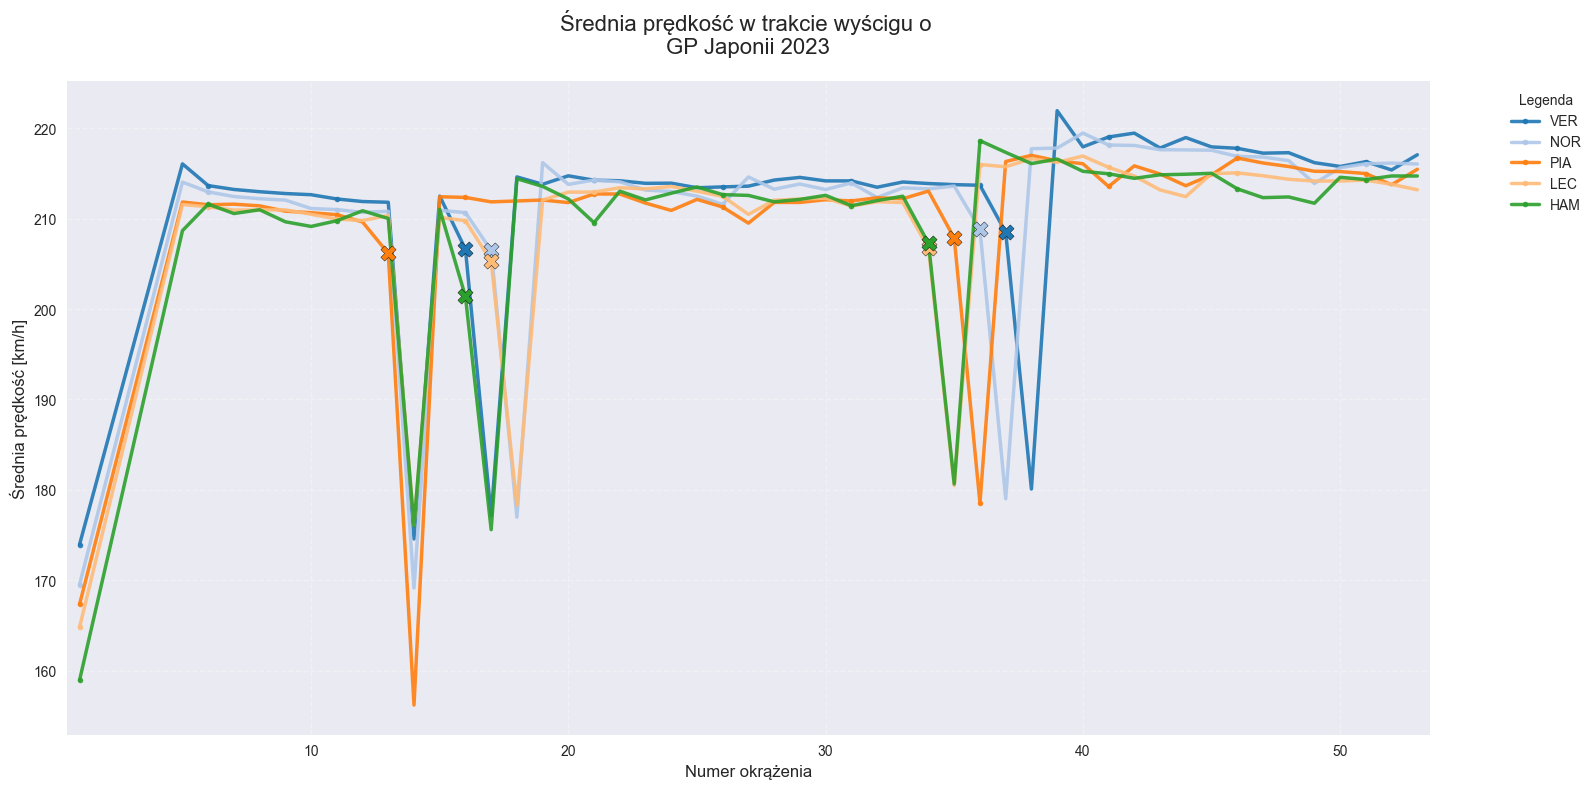

In [48]:
import fastf1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap

# Inicjalizacja cache
fastf1.Cache.enable_cache('cache')

# Lista wyścigów
races = [
    {'year': 2023, 'gp': 'Spain', 'label': 'GP Hiszpanii'},
    {'year': 2023, 'gp': 'Austria', 'label': 'GP Austrii'},
    {'year': 2023, 'gp': 'Italy', 'label': 'GP Włoch'},
    {'year': 2023, 'gp': 'Monaco', 'label': 'GP Monako'},
    {'year': 2023, 'gp': 'Netherlands', 'label': ' GP Holandii'},
    {'year': 2023, 'gp': 'Japan', 'label': 'GP Japonii'}
]

# Unikalne kolory dla każdego kierowcy
cmap = ListedColormap(plt.cm.tab20.colors + plt.cm.tab20b.colors)

# Stałe długości torów (w km) - ręcznie uzupełnione
track_lengths = {
    'Spain': 4.675,
    'Austria': 4.318,
    'Italy': 5.793,
    'Monaco': 3.337,
    'Netherlands': 4.259,
    'Japan': 5.807
}

for race in races:
    try:
        # Pobranie danych
        session = fastf1.get_session(race['year'], race['gp'], 'R')
        session.load()
        
        # Pobranie zdarzeń wyścigowych
        race_control = session.race_control_messages
        safety_car = race_control[race_control['Message'].str.contains('Safety Car', na=False)]
        yellow_flags = race_control[race_control['Message'].str.contains('Yellow Flag', na=False)]
        
        # Pobranie top 5 zawodników
        results = session.results[:5]
        drivers = results['Abbreviation'].tolist()
        
        # Przygotowanie wykresu
        plt.figure(figsize=(16, 8))
        
        # Dla każdego kierowcy
        for i, driver in enumerate(drivers):
            # Pobranie okrążeń kierowcy
            laps = session.laps.pick_drivers([driver]).reset_index(drop=True)
            
            # Obliczenie średniej prędkości (km/h)
            track_length = track_lengths.get(race['gp'], 5.0)  # Domyślna wartość 5km jeśli brak danych
            laps['AvgSpeed'] = track_length / (laps['LapTime'].dt.total_seconds() / 3600)
            
            # Interpolacja brakujących danych
            complete_laps = pd.DataFrame({'LapNumber': range(1, session.total_laps+1)})
            merged = complete_laps.merge(laps[['LapNumber', 'AvgSpeed']], on='LapNumber', how='left')
            merged['AvgSpeed'] = merged['AvgSpeed'].interpolate(limit_area='inside')
            
            # Rysowanie linii prędkości
            plt.plot(
                merged['LapNumber'],
                merged['AvgSpeed'],
                label=f"{driver}",
                color=cmap(i),
                linewidth=2.5,
                alpha=0.9,
                marker='o',
                markersize=4,
                markevery=5
            )
            
            # Zaznaczenie pit stopów
            pit_stops = laps[laps['PitInTime'].notna()]
            for _, pit_lap in pit_stops.iterrows():
                plt.scatter(
                    pit_lap['LapNumber'],
                    pit_lap['AvgSpeed'],
                    color=cmap(i),
                    edgecolor='black',
                    s=120,
                    zorder=5,
                    marker='X'
                )
        
        # Dodanie oznaczeń Safety Car i żółtych flag
        for _, sc in safety_car.iterrows():
            lap = pd.to_numeric(sc['LapNumber'], errors='coerce')
            if not pd.isna(lap):
                plt.axvspan(
                    lap - 0.5,
                    lap + 0.5,
                    color='yellow',
                    alpha=0.3,
                    label='Safety Car' if sc.name == safety_car.index[0] else ""
                )
        
        for _, yf in yellow_flags.iterrows():
            lap = pd.to_numeric(yf['LapNumber'], errors='coerce')
            if not pd.isna(lap):
                plt.axvspan(
                    lap - 0.5,
                    lap + 0.5,
                    color='orange',
                    alpha=0.2,
                    hatch='//',
                    label='Yellow Flag' if yf.name == yellow_flags.index[0] else ""
                )
        
        # Formatowanie wykresu
        plt.title(f'Średnia prędkość w trakcie wyścigu o \n{race["label"]} 2023',
                fontsize=16, pad=20)
        plt.xlabel('Numer okrążenia', fontsize=12)
        plt.ylabel('Średnia prędkość [km/h]', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.3)
        
        # Ustawienie zakresu osi X
        plt.xlim(0.5, session.total_laps + 0.5)
        
        # Legenda
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(
            by_label.values(),
            by_label.keys(),
            title='Legenda',
            bbox_to_anchor=(1.05, 1),
            loc='upper left'
        )
        
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"❌ Błąd dla {race['label']}: {str(e)}")